In [1]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from spicy import stats # type:ignore
from sklearn.preprocessing import MinMaxScaler,RobustScaler # type:ignore
from pandas.plotting import andrews_curves # type:ignore
from pandas.plotting import radviz # type:ignore
import os # type:ignore
import re # type:ignore

# data import and preparation

Choose a multidimensional data set. Describe the data set in the report: meaning, numbers and properties of objects (instances) and features (attributes, parameters).

In [2]:
pd.set_option('display.max_columns',None)  

In [3]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [4]:
raw_data

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
1        Albania              105           AL                43.10%   
2        Algeria               18           DZ                17.40%   
3        Andorra              164           AD                40.00%   
4         Angola               26           AO                47.50%   
..           ...              ...          ...                   ...   
190    Venezuela               32           VE                24.50%   
191      Vietnam              314           VN                39.30%   
192        Yemen               56           YE                44.60%   
193       Zambia               25           ZM                32.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000       32.49          93.0   
1           28,748             9,000       11.78         355.0   
2        2,381,741           317,000       24.28         213.0   
3              468               NaN        7.20         376.0   
4        1,246,700           117,000       40.73         244.0   
..             ...               ...         ...           ...   
190        912,050           343,000       17.88          58.0   
191        331,210           522,000       16.75          84.0   
192        527,968            40,000       30.45         967.0   
193        752,618            16,000       36.19         260.0   
194        390,757            51,000       30.68         263.0   

    Capital/Major City Co2-Emissions       CPI CPI Change (%) Currency-Code  \
0                Kabul         8,672     149.9          2.30%           AFN   
1               Tirana         4,536    119.05          1.40%           ALL   
2              Algiers       150,006    151.36          2.00%           DZD   
3     Andorra la Vella           469       NaN            NaN           EUR   
4               Luanda        34,693    261.73         17.10%           AOA   
..                 ...           ...       ...            ...           ...   
190            Caracas       164,175  2,740.27        254.90%           VED   
191              Hanoi       192,668    163.52          2.80%           VND   
192              Sanaa        10,609    157.58          8.10%           YER   
193             Lusaka         5,141    212.31          9.20%           ZMW   
194             Harare        10,983    105.51          0.90%           NaN   

     Fertility Rate Forested Area (%) Gasoline Price                GDP  \
0              4.47             2.10%         $0.70    $19,101,353,833    
1              1.62            28.10%         $1.36    $15,278,077,447    
2              3.02             0.80%         $0.28   $169,988,236,398    
3              1.27            34.00%         $1.51     $3,154,057,987    
4              5.52            46.30%         $0.97    $94,635,415,870    
..              ...               ...            ...                ...   
190            2.27            52.70%         $0.00   $482,359,318,768    
191            2.05            48.10%         $0.80   $261,921,244,843    
192            3.79             1.00%         $0.92    $26,914,402,224    
193            4.63            65.20%         $1.40    $23,064,722,446    
194            3.62            35.50%         $1.34    $21,440,758,800    

    Gross primary education enrollment (%)  \
0                                  104.00%   
1                                  107.00%   
2                                  109.90%   
3                                  106.40%   
4                                  113.50%   
..                                     ...   
190                                 97.20%   
191                                110.60%   
192                                 93.60%   
193                                 98.70

In [5]:

raw_data = raw_data.rename(columns={'Density\n(P/Km2)':'Density(P/Km2)',
                                    'Agricultural Land( %)':'Agricultural Land(%)',
                                    'Armed Forces size':'Armed Forces',
                                    'Capital/Major City':'Capital',
                                    'CPI Change (%)':'CPI Change(%)',
                                    'Forested Area (%)':'Forested Area(%)',
                                    'Gross primary education enrollment (%)':'Primary educ. enr.(%)',
                                    'Gross tertiary education enrollment (%)':'Tertiary educ. enr.(%)',
                                    'Out of pocket health expenditure':'Self-paid Health',
                                    'Tax revenue (%)':'Tax revenue(%)',
                                    'Official language':'Language',
                                    'Physicians per thousand':'Doctors/1000',
                                    'Population: Labor force participation (%)':'Labor force participation(%)',
                                    'Urban_population':'Urban population'})

In [6]:
raw_data.iloc[150]

Country                          S�����������
Density(P/Km2)                            228
Abbreviation                               ST
Agricultural Land(%)                   50.70%
Land Area(Km2)                            964
Armed Forces                            1,000
Birth Rate                              31.54
Calling Code                            239.0
Capital                                 S����
Co2-Emissions                             121
CPI                                    185.09
CPI Change(%)                           7.90%
Currency-Code                             STN
Fertility Rate                           4.32
Forested Area(%)                       55.80%
Gasoline Price                            NaN
GDP                             $429,016,605 
Primary educ. enr.(%)                 106.80%
Tertiary educ. enr.(%)                 13.40%
Infant mortality                         24.4
Largest city                            S����
Life expectancy                   

In [7]:
raw_data.loc[150, 'Country'] = 'São Tomé e Príncipe'

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Density(P/Km2)                195 non-null    object 
 2   Abbreviation                  188 non-null    object 
 3   Agricultural Land(%)          188 non-null    object 
 4   Land Area(Km2)                194 non-null    object 
 5   Armed Forces                  171 non-null    object 
 6   Birth Rate                    189 non-null    float64
 7   Calling Code                  194 non-null    float64
 8   Capital                       192 non-null    object 
 9   Co2-Emissions                 188 non-null    object 
 10  CPI                           178 non-null    object 
 11  CPI Change(%)                 179 non-null    object 
 12  Currency-Code                 180 non-null    object 
 13  Ferti

In [9]:
raw_data.loc[:,'Country':'Birth Rate']

Country Density(P/Km2) Abbreviation Agricultural Land(%)  \
0    Afghanistan             60           AF               58.10%   
1        Albania            105           AL               43.10%   
2        Algeria             18           DZ               17.40%   
3        Andorra            164           AD               40.00%   
4         Angola             26           AO               47.50%   
..           ...            ...          ...                  ...   
190    Venezuela             32           VE               24.50%   
191      Vietnam            314           VN               39.30%   
192        Yemen             56           YE               44.60%   
193       Zambia             25           ZM               32.10%   
194     Zimbabwe             38           ZW               41.90%   

    Land Area(Km2) Armed Forces  Birth Rate  
0          652,230      323,000       32.49  
1           28,748        9,000       11.78  
2        2,381,741      317,000       24.28  
3              468          NaN        7.20  
4        1,246,700      117,000       40.73  
..             ...          ...         ...  
190        912,050      343,000       17.88  
191        331,210      522,000       16.75  
192        527,968       40,000       30.45  
193        752,618       16,000       36.19  
194        390,757       51,000       30.68  

[195 rows x 7 columns]

In [10]:
raw_data.loc[:,'Calling Code':'Fertility Rate']

Calling Code           Capital Co2-Emissions       CPI CPI Change(%)  \
0            93.0             Kabul         8,672     149.9         2.30%   
1           355.0            Tirana         4,536    119.05         1.40%   
2           213.0           Algiers       150,006    151.36         2.00%   
3           376.0  Andorra la Vella           469       NaN           NaN   
4           244.0            Luanda        34,693    261.73        17.10%   
..            ...               ...           ...       ...           ...   
190          58.0           Caracas       164,175  2,740.27       254.90%   
191          84.0             Hanoi       192,668    163.52         2.80%   
192         967.0             Sanaa        10,609    157.58         8.10%   
193         260.0            Lusaka         5,141    212.31         9.20%   
194         263.0            Harare        10,983    105.51         0.90%   

    Currency-Code  Fertility Rate  
0             AFN            4.47  
1             ALL            1.62  
2             DZD            3.02  
3             EUR            1.27  
4             AOA            5.52  
..            ...             ...  
190           VED            2.27  
191           VND            2.05  
192           YER            3.79  
193           ZMW            4.63  
194           NaN            3.62  

[195 rows x 7 columns]

In [11]:
raw_data.loc[:,'Life expectancy':'Population']

Life expectancy  Maternal mortality ratio Minimum wage    Language  \
0               64.5                     638.0       $0.43       Pashto   
1               78.5                      15.0       $1.12     Albanian   
2               76.7                     112.0       $0.95       Arabic   
3                NaN                       NaN       $6.63      Catalan   
4               60.8                     241.0       $0.71   Portuguese   
..               ...                       ...          ...         ...   
190             72.1                     125.0       $0.01      Spanish   
191             75.3                      43.0       $0.73   Vietnamese   
192             66.1                     164.0          NaN      Arabic   
193             63.5                     213.0       $0.24      English   
194             61.2                     458.0          NaN       Shona   

    Self-paid Health  Doctors/1000  Population  
0             78.40%          0.28  38,041,754  
1             56.90%          1.20   2,854,191  
2             28.10%          1.72  43,053,054  
3             36.40%          3.33      77,142  
4             33.40%          0.21  31,825,295  
..               ...           ...         ...  
190           45.80%          1.92  28,515,829  
191           43.50%          0.82  96,462,106  
192           81.00%          0.31  29,161,922  
193           27.50%          1.19  17,861,030  
194           25.80%          0.21  14,645,468  

[195 rows x 7 columns]

In [12]:
raw_data.loc[:,'Forested Area(%)':'Largest city'] 

Forested Area(%) Gasoline Price                GDP Primary educ. enr.(%)  \
0              2.10%         $0.70    $19,101,353,833                104.00%   
1             28.10%         $1.36    $15,278,077,447                107.00%   
2              0.80%         $0.28   $169,988,236,398                109.90%   
3             34.00%         $1.51     $3,154,057,987                106.40%   
4             46.30%         $0.97    $94,635,415,870                113.50%   
..               ...            ...                ...                   ...   
190           52.70%         $0.00   $482,359,318,768                 97.20%   
191           48.10%         $0.80   $261,921,244,843                110.60%   
192            1.00%         $0.92    $26,914,402,224                 93.60%   
193           65.20%         $1.40    $23,064,722,446                 98.70%   
194           35.50%         $1.34    $21,440,758,800                109.90%   

    Tertiary educ. enr.(%)  Infant mortality      Largest city  
0                    9.70%              47.9             Kabul  
1                   55.00%               7.8            Tirana  
2                   51.40%              20.1           Algiers  
3                      NaN               2.7  Andorra la Vella  
4                    9.30%              51.6            Luanda  
..                     ...               ...               ...  
190                 79.30%              21.4           Caracas  
191                 28.50%              16.5  Ho Chi Minh City  
192                 10.20%              42.9             Sanaa  
193                  4.10%              40.4            Lusaka  
194                 10.00%              33.9            Harare  

[195 rows x 7 columns]

In [13]:
raw_data.loc[:,'Labor force participation(%)':]

Labor force participation(%) Tax revenue(%) Total tax rate  \
0                         48.90%          9.30%         71.40%   
1                         55.70%         18.60%         36.60%   
2                         41.20%         37.20%         66.10%   
3                            NaN            NaN            NaN   
4                         77.50%          9.20%         49.10%   
..                           ...            ...            ...   
190                       59.70%            NaN         73.30%   
191                       77.40%         19.10%         37.60%   
192                       38.00%            NaN         26.60%   
193                       74.60%         16.20%         15.60%   
194                       83.10%         20.70%         31.60%   

    Unemployment rate Urban population   Latitude   Longitude  
0              11.12%        9,797,273  33.939110   67.709953  
1              12.33%        1,747,593  41.153332   20.168331  
2              11.70%       31,510,100  28.033886    1.659626  
3                 NaN           67,873  42.506285    1.521801  
4               6.89%       21,061,025 -11.202692   17.873887  
..                ...              ...        ...         ...  
190             8.80%       25,162,368   6.423750  -66.589730  
191             2.01%       35,332,140  14.058324  108.277199  
192            12.91%       10,869,523  15.552727   48.516388  
193            11.43%        7,871,713 -13.133897   27.849332  
194             4.95%        4,717,305 -19.015438   29.154857  

[195 rows x 7 columns]

In [14]:
raw_data = raw_data.drop(['Abbreviation','Calling Code','Capital','Currency-Code','Largest city','Language',
                        'Latitude','Longitude'],axis=1)

In [15]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country'])

In [16]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

In [17]:
ordered_columns = [
    # demography
    "Country","Density(P/Km2)","Urban population","Population",
    
    # economy
    "Armed Forces","GDP","Minimum wage","Labor force participation(%)","Unemployment rate","Tax revenue(%)","Total tax rate","CPI","CPI Change(%)",
    
    # health
    "Doctors/1000","Self-paid Health","Birth Rate","Fertility Rate","Life expectancy","Infant mortality","Maternal mortality ratio",
    
    # enviroment
    "Co2-Emissions","Land Area(Km2)","Forested Area(%)","Agricultural Land(%)","Gasoline Price",
    
    # education
    "Primary educ. enr.(%)", "Tertiary educ. enr.(%)",
]

In [18]:
raw_data = raw_data[ordered_columns]

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Density(P/Km2)                195 non-null    float64
 2   Urban population              190 non-null    float64
 3   Population                    194 non-null    float64
 4   Armed Forces                  171 non-null    float64
 5   GDP                           193 non-null    float64
 6   Minimum wage                  150 non-null    float64
 7   Labor force participation(%)  176 non-null    float64
 8   Unemployment rate             176 non-null    float64
 9   Tax revenue(%)                169 non-null    float64
 10  Total tax rate                183 non-null    float64
 11  CPI                           178 non-null    float64
 12  CPI Change(%)                 179 non-null    float64
 13  Docto

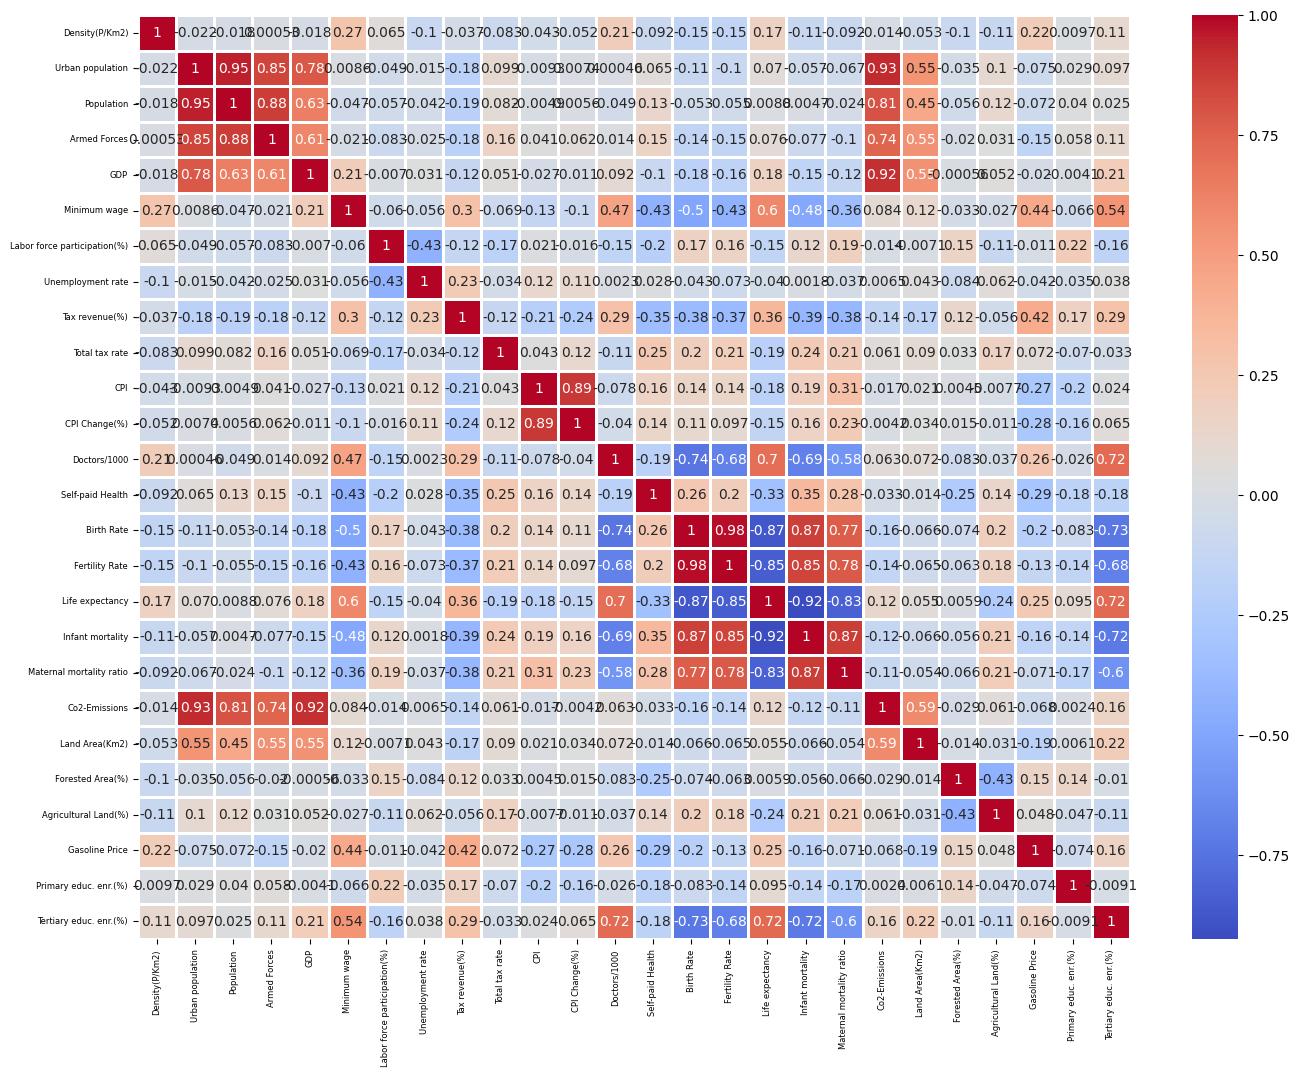

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country'],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

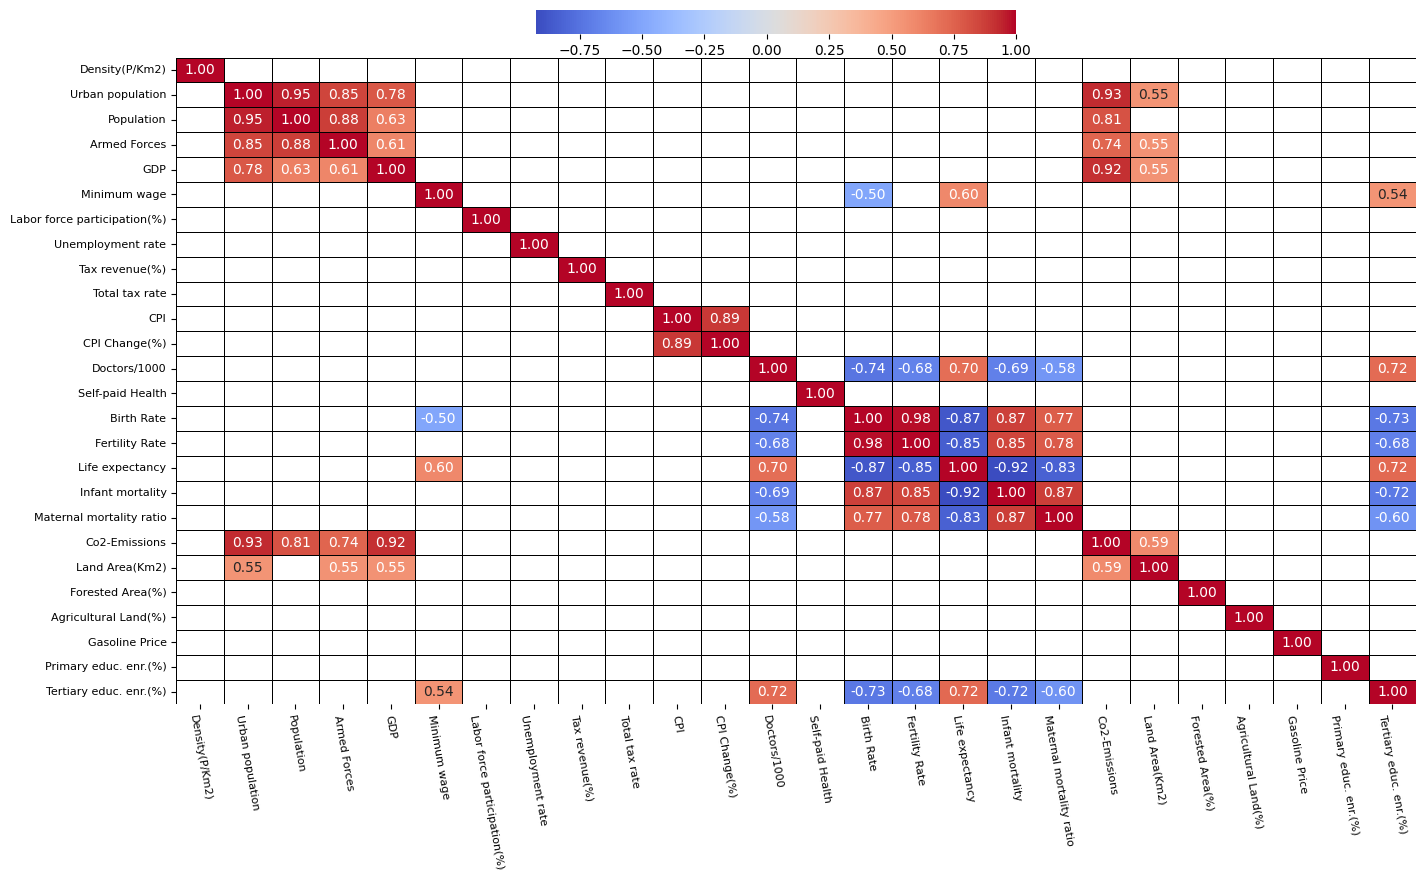

In [21]:
plt.figure(figsize=(16,12))
corr_matrix = raw_data.drop(['Country'],axis=1).corr()

mask = np.abs(corr_matrix) < 0.5 

ax = sns.heatmap(corr_matrix,cmap='coolwarm',linecolor='black',linewidths=0.5,annot=True,fmt=".2f",mask=mask,
                 cbar_kws={"orientation":"horizontal"})  
cbar = ax.collections[0].colorbar
cbar.ax.set_position([0.3, 0.9, 0.4, 0.02])  

plt.xticks(fontsize=8, rotation=280)  
plt.yticks(fontsize=8)
plt.show()

In [22]:
dataset_raw = raw_data.copy()

In [23]:
dataset_raw.dropna(inplace=True)

In [24]:
dataset_raw

Country  Density(P/Km2)  Urban population   Population  \
0       Afghanistan            60.0         9797273.0   38041754.0   
1           Albania           105.0         1747593.0    2854191.0   
2           Algeria            18.0        31510100.0   43053054.0   
4            Angola            26.0        21061025.0   31825295.0   
6         Argentina            17.0        41339571.0   44938712.0   
..              ...             ...               ...          ...   
185  United Kingdom           281.0        55908316.0   66834405.0   
186   United States            36.0       270663028.0  328239523.0   
187         Uruguay            20.0         3303394.0    3461734.0   
191         Vietnam           314.0        35332140.0   96462106.0   
193          Zambia            25.0         7871713.0   17861030.0   

     Armed Forces           GDP  Minimum wage  Labor force participation(%)  \
0        323000.0  1.910135e+10          0.43                          48.9   
1          9000.0  1.527808e+10          1.12                          55.7   
2        317000.0  1.699882e+11          0.95                          41.2   
4        117000.0  9.463542e+10          0.71                          77.5   
6        105000.0  4.496634e+11          3.35                          61.3   
..            ...           ...           ...                           ...   
185      148000.0  2.827113e+12         10.13                          62.8   
186     1359000.0  2.142770e+13          7.25                          62.0   
187       22000.0  5.604591e+10          1.66                          64.0   
191      522000.0  2.619212e+11          0.73                          77.4   
193       16000.0  2.306472e+10          0.24                          74.6   

     Unemployment rate  Tax revenue(%)  Total tax rate     CPI  CPI Change(%)  \
0                11.12             9.3            71.4  149.90            2.3   
1                12.33            18.6            36.6  119.05            1.4   
2                11.70            37.2            66.1  151.36            2.0   
4                 6.89             9.2            49.1  261.73           17.1   
6                 9.79            10.1           106.3  232.75           53.5   
..                 ...             ...             ...     ...            ...   
185               3.85            25.5            30.6  119.62            1.7   
186              14.70             9.6            36.6  117.24            7.5   
187               8.73            20.1            41.8  202.92            7.9   
191               2.01            19.1            37.6  163.52            2.8   
193              11.43            16.2            15.6  212.31            9.2   

     Doctors/1000  Self-paid Health  Birth Rate  Fertility Rate  \
0            0.28              78.4       32.49            4.47   
1            1.20              56.9       11.78            1.62   
2            1.72              28.1       24.28            3.02   
4            0.21              33.4       40.73            5.52   
6            3.96              17.6       17.02            2.26   
..            ...               ...         ...             ...   
185          2.81              14.8       11.00            1.68   
186          2.61              11.1       11.60            1.73   
187          5.05              16.2       13.86            1.97   
191          0.82              43.5       16.75            2.05   
193          1.19              27.5       36.19            4.63   

     Life expectancy  Infant mortality  Maternal mortality ratio  \
0               64.5              47.9                     638.0   
1               78.5               7.8                      15.0   
2               76.7              20.1                     112.0   
4               60.8              51.6                     241.0   
6               76.5               8.8                      39.0   
..               ...               .

In [25]:
dataset_raw.to_csv('dataset_raw.csv',index=False) # dataset before any transformation without missing values

In [26]:
dataset = raw_data.drop(['Infant mortality','Land Area(Km2)','Co2-Emissions','CPI Change(%)','Fertility Rate',
                         'Doctors/1000','Gasoline Price','Minimum wage','Tertiary educ. enr.(%)',
                         'Maternal mortality ratio','Life expectancy','Tax revenue(%)','Population','Urban population'],axis=1)

In [27]:
dataset.dropna(inplace=True)

In [28]:
dataset.head()

Country  Density(P/Km2)  Armed Forces           GDP  \
0  Afghanistan            60.0      323000.0  1.910135e+10   
1      Albania           105.0        9000.0  1.527808e+10   
2      Algeria            18.0      317000.0  1.699882e+11   
4       Angola            26.0      117000.0  9.463542e+10   
6    Argentina            17.0      105000.0  4.496634e+11   

   Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
0                          48.9              11.12            71.4  149.90   
1                          55.7              12.33            36.6  119.05   
2                          41.2              11.70            66.1  151.36   
4                          77.5               6.89            49.1  261.73   
6                          61.3               9.79           106.3  232.75   

   Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0              78.4       32.49               2.1                  58.1   
1              56.9       11.78              28.1                  43.1   
2              28.1       24.28               0.8                  17.4   
4              33.4       40.73              46.3                  47.5   
6              17.6       17.02               9.8                  54.3   

   Primary educ. enr.(%)  
0                  104.0  
1                  107.0  
2                  109.9  
4                  113.5  
6                  109.7

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       160 non-null    object 
 1   Density(P/Km2)                160 non-null    float64
 2   Armed Forces                  160 non-null    float64
 3   GDP                           160 non-null    float64
 4   Labor force participation(%)  160 non-null    float64
 5   Unemployment rate             160 non-null    float64
 6   Total tax rate                160 non-null    float64
 7   CPI                           160 non-null    float64
 8   Self-paid Health              160 non-null    float64
 9   Birth Rate                    160 non-null    float64
 10  Forested Area(%)              160 non-null    float64
 11  Agricultural Land(%)          160 non-null    float64
 12  Primary educ. enr.(%)         160 non-null    float64
dtypes: float64

In [30]:
dataset.describe().round(2)

Density(P/Km2)  Armed Forces           GDP  \
count          160.00        160.00  1.600000e+02   
mean           212.76     156300.00  5.733593e+11   
std            707.71     378584.48  2.375542e+12   
min              2.00          0.00  4.290166e+08   
25%             31.75      10750.00  1.433814e+10   
50%             83.00      29500.00  5.355460e+10   
75%            152.25     136500.00  3.034813e+11   
max           8358.00    3031000.00  2.142770e+13   

       Labor force participation(%)  Unemployment rate  Total tax rate  \
count                        160.00             160.00          160.00   
mean                          62.73               6.80           39.82   
std                           10.27               4.92           15.35   
min                           38.00               0.09            8.00   
25%                           56.42               3.40           30.60   
50%                           62.15               5.38           37.55   
75%                           68.95               9.21           47.50   
max                           86.80              28.18          106.30   

           CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
count   160.00            160.00      160.00            160.00   
mean    171.26             33.47       20.37             30.47   
std     232.11             18.45        9.99             23.05   
min      99.03              5.30        6.40              0.00   
25%     115.14             18.20       11.23             10.48   
50%     129.09             32.10       18.12             31.15   
75%     162.54             43.98       28.83             47.18   
max    2740.27             81.60       46.08             98.30   

       Agricultural Land(%)  Primary educ. enr.(%)  
count                160.00                 160.00  
mean                  39.46                 103.11  
std                   21.74                  11.83  
min                    0.60                  61.80  
25%                   22.88                  98.95  
50%                   40.00                 102.35  
75%                   55.02                 107.52  
max                   82.60                 142.50

## correlation studies

In [31]:
dataset.drop(['Country',],axis=1).corr()

Density(P/Km2)  Armed Forces       GDP  \
Density(P/Km2)                      1.000000     -0.001345 -0.009631   
Armed Forces                       -0.001345      1.000000  0.632299   
GDP                                -0.009631      0.632299  1.000000   
Labor force participation(%)        0.075132     -0.136101 -0.007185   
Unemployment rate                  -0.114883     -0.003975  0.038622   
Total tax rate                     -0.154226      0.158017  0.089542   
CPI                                -0.044617      0.062207 -0.029153   
Self-paid Health                    0.019683      0.156528 -0.124016   
Birth Rate                         -0.150781     -0.144134 -0.200245   
Forested Area(%)                   -0.119880     -0.028846  0.015731   
Agricultural Land(%)               -0.115295      0.052401  0.052171   
Primary educ. enr.(%)              -0.000836      0.037946 -0.017783   

                              Labor force participation(%)  Unemployment rate  \
Density(P/Km2)                                    0.075132          -0.114883   
Armed Forces                                     -0.136101          -0.003975   
GDP                                              -0.007185           0.038622   
Labor force participation(%)                      1.000000          -0.469287   
Unemployment rate                                -0.469287           1.000000   
Total tax rate                                   -0.153379           0.008996   
CPI                                              -0.077920           0.113326   
Self-paid Health                                 -0.216806           0.015011   
Birth Rate                                        0.187142          -0.020339   
Forested Area(%)                                  0.149177          -0.119476   
Agricultural Land(%)                             -0.083346           0.093534   
Primary educ. enr.(%)                             0.253734           0.001884   

                              Total tax rate       CPI  Self-paid Health  \
Density(P/Km2)                     -0.154226 -0.044617          0.019683   
Armed Forces                        0.158017  0.062207          0.156528   
GDP                                 0.089542 -0.029153         -0.124016   
Labor force participation(%)       -0.153379 -0.077920         -0.216806   
Unemployment rate                   0.008996  0.113326          0.015011   
Total tax rate                      1.000000  0.196402          0.189269   
CPI                                 0.196402  1.000000          0.123986   
Self-paid Health                    0.189269  0.123986          1.000000   
Birth Rate                          0.212422  0.089296          0.287166   
Forested Area(%)                    0.052578  0.020567         -0.192119   
Agricultural Land(%)                0.093232 -0.021295          0.075625   
Primary educ. enr.(%)              -0.012215 -0.055368         -0.162439   

                              Birth Rate  Forested Area(%)  \
Density(P/Km2)                 -0.150781         -0.119880   
Armed Forces                   -0.144134         -0.028846   
GDP                            -0.200245          0.015731   
Labor force participation(%)    0.187142          0.149177   
Unemployment rate              -0.020339         -0.119476   
Total tax rate                  0.212422          0.052578   
CPI                             0.089296          0.020567   
Self-paid Health                0.287166         -0.192119   
Birth Rate                      1.000000         -0.060518   
Forested Area(%)               -0.060518          1.000000   
Agricultural Land(%)            0.169065         -0.412526   
Primary educ. enr.(%)           0.053573          0.126639   

                              Agricultural Land(%)  Primary educ. enr.(%)  
Density(P/Km2)                           -0.115295              -0.000836  
Armed Forces                              0.052401               0.037946  
GDP            

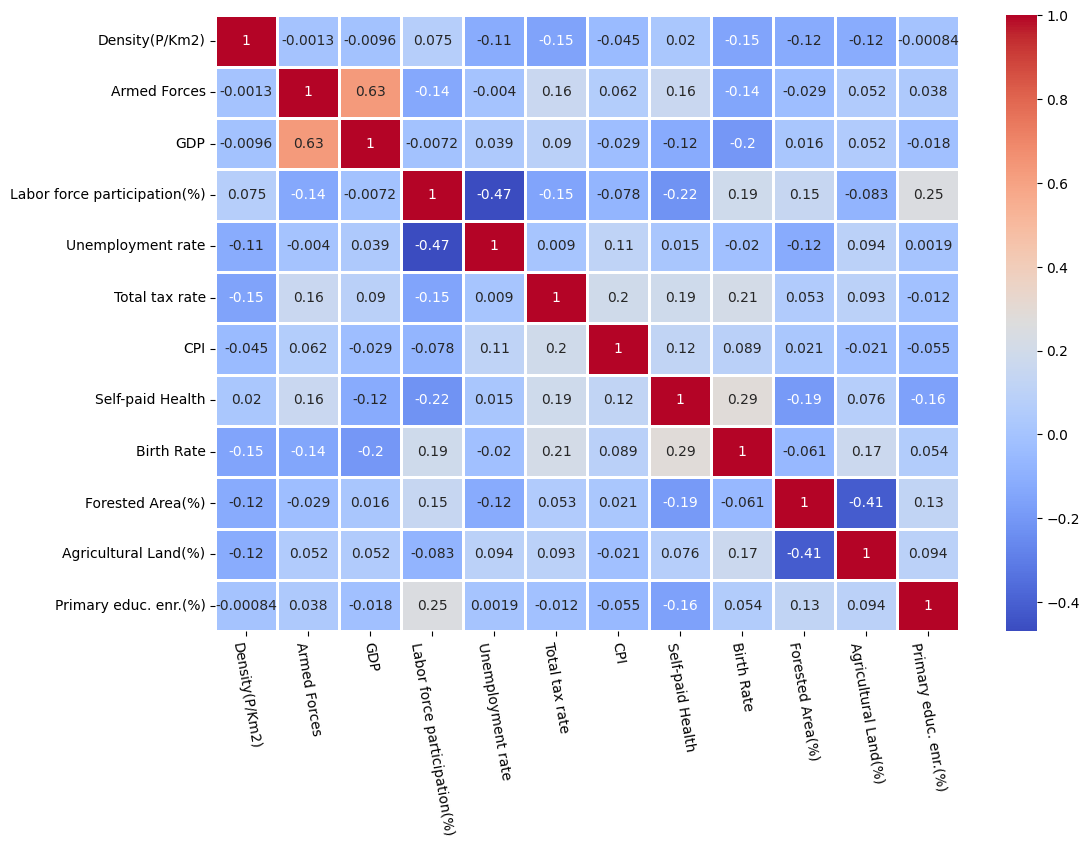

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country',],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(rotation=280)  
plt.show()

# EDA

Visualize multidimensional data set using at least three direct visualization methods. Include at least three images in the report and comment them. Include general conclusions describing insights about the data and comparing results of different methods indicating which one is most useful for the analyzed data.

In [33]:
dataset

Country  Density(P/Km2)  Armed Forces           GDP  \
0    Afghanistan            60.0      323000.0  1.910135e+10   
1        Albania           105.0        9000.0  1.527808e+10   
2        Algeria            18.0      317000.0  1.699882e+11   
4         Angola            26.0      117000.0  9.463542e+10   
6      Argentina            17.0      105000.0  4.496634e+11   
..           ...             ...           ...           ...   
190    Venezuela            32.0      343000.0  4.823593e+11   
191      Vietnam           314.0      522000.0  2.619212e+11   
192        Yemen            56.0       40000.0  2.691440e+10   
193       Zambia            25.0       16000.0  2.306472e+10   
194     Zimbabwe            38.0       51000.0  2.144076e+10   

     Labor force participation(%)  Unemployment rate  Total tax rate      CPI  \
0                            48.9              11.12            71.4   149.90   
1                            55.7              12.33            36.6   119.05   
2                            41.2              11.70            66.1   151.36   
4                            77.5               6.89            49.1   261.73   
6                            61.3               9.79           106.3   232.75   
..                            ...                ...             ...      ...   
190                          59.7               8.80            73.3  2740.27   
191                          77.4               2.01            37.6   163.52   
192                          38.0              12.91            26.6   157.58   
193                          74.6              11.43            15.6   212.31   
194                          83.1               4.95            31.6   105.51   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0                78.4       32.49               2.1                  58.1   
1                56.9       11.78              28.1                  43.1   
2                28.1       24.28               0.8                  17.4   
4                33.4       40.73              46.3                  47.5   
6                17.6       17.02               9.8                  54.3   
..                ...         ...               ...                   ...   
190              45.8       17.88              52.7                  24.5   
191              43.5       16.75              48.1                  39.3   
192              81.0       30.45               1.0                  44.6   
193              27.5       36.19              65.2                  32.1   
194              25.8       30.68              35.5                  41.9   

     Primary educ. enr.(%)  
0                    104.0  
1                    107.0  
2                    109.9  
4                    113.5  
6                    109.7  
..                     ...  
190                   97.2  
191                  110.6  
192                   93.6  
193                   98.7  
194                  109.9  

[160 rows x 13 columns]

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       160 non-null    object 
 1   Density(P/Km2)                160 non-null    float64
 2   Armed Forces                  160 non-null    float64
 3   GDP                           160 non-null    float64
 4   Labor force participation(%)  160 non-null    float64
 5   Unemployment rate             160 non-null    float64
 6   Total tax rate                160 non-null    float64
 7   CPI                           160 non-null    float64
 8   Self-paid Health              160 non-null    float64
 9   Birth Rate                    160 non-null    float64
 10  Forested Area(%)              160 non-null    float64
 11  Agricultural Land(%)          160 non-null    float64
 12  Primary educ. enr.(%)         160 non-null    float64
dtypes: float64

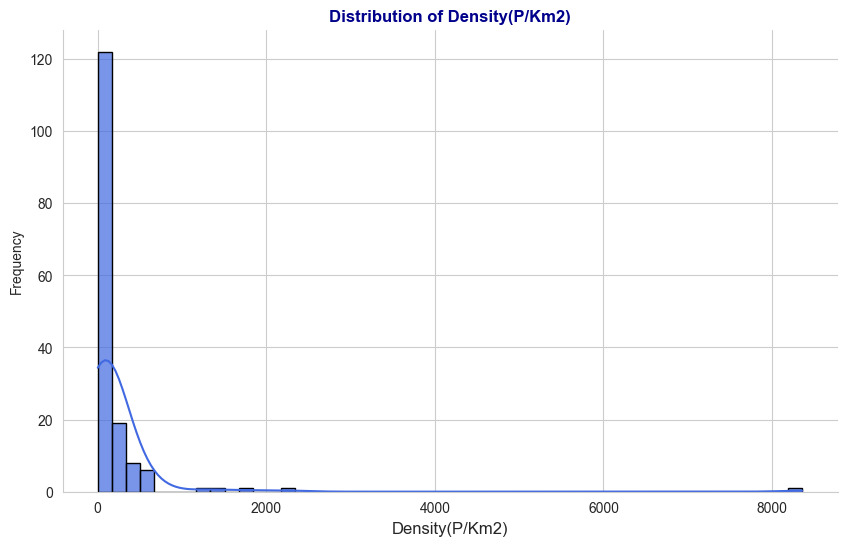

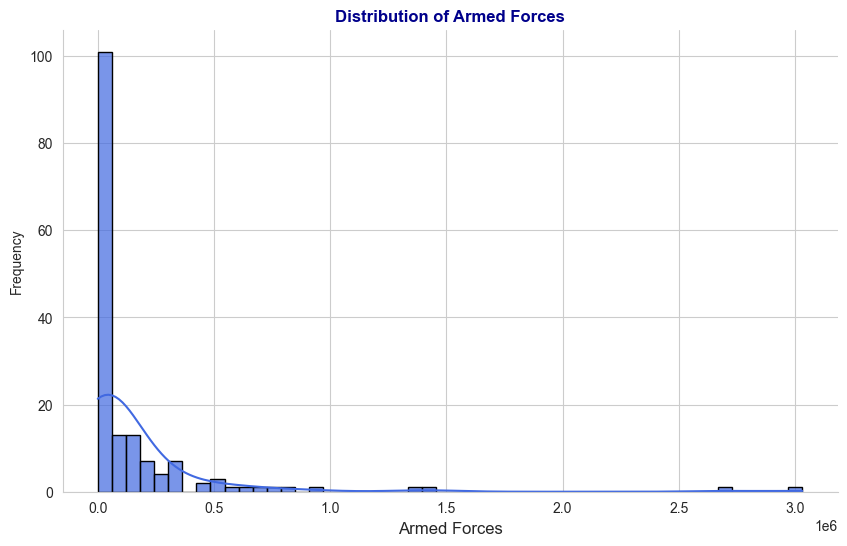

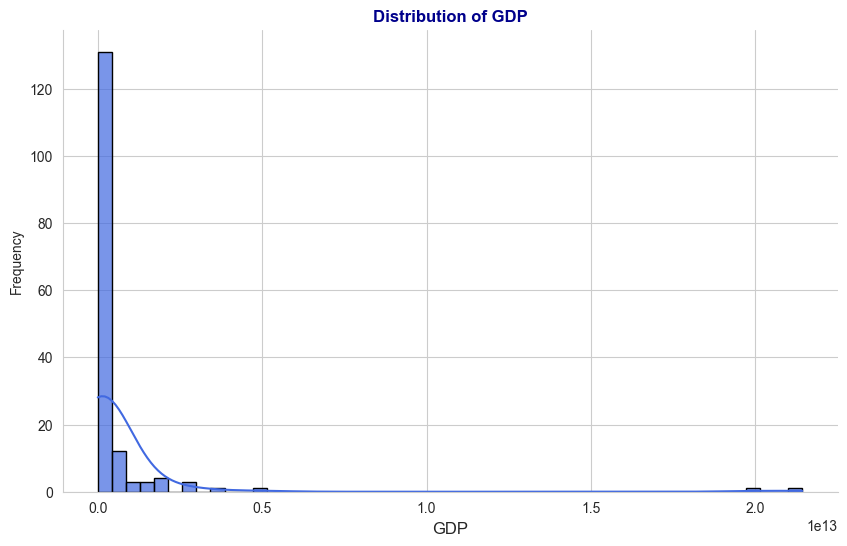

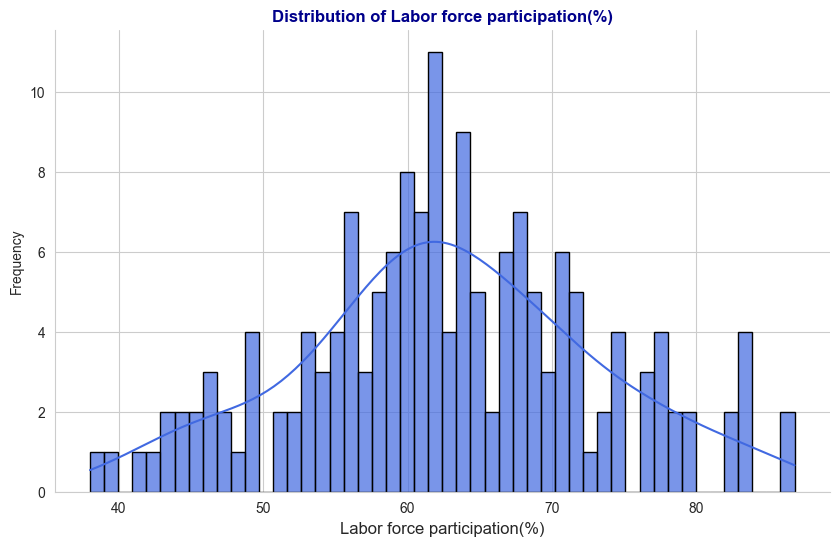

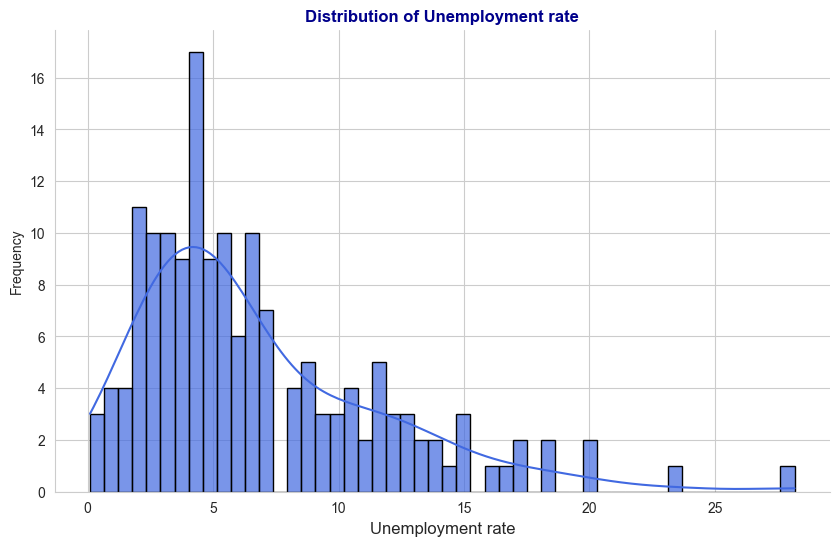

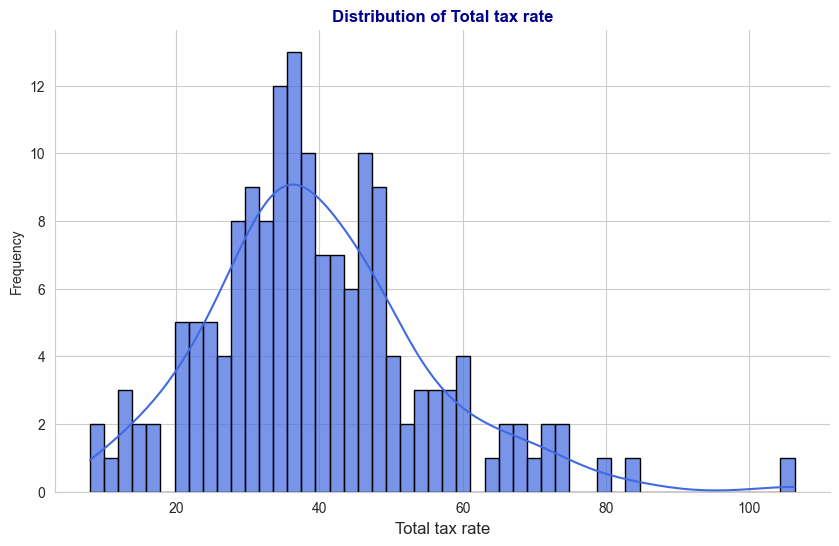

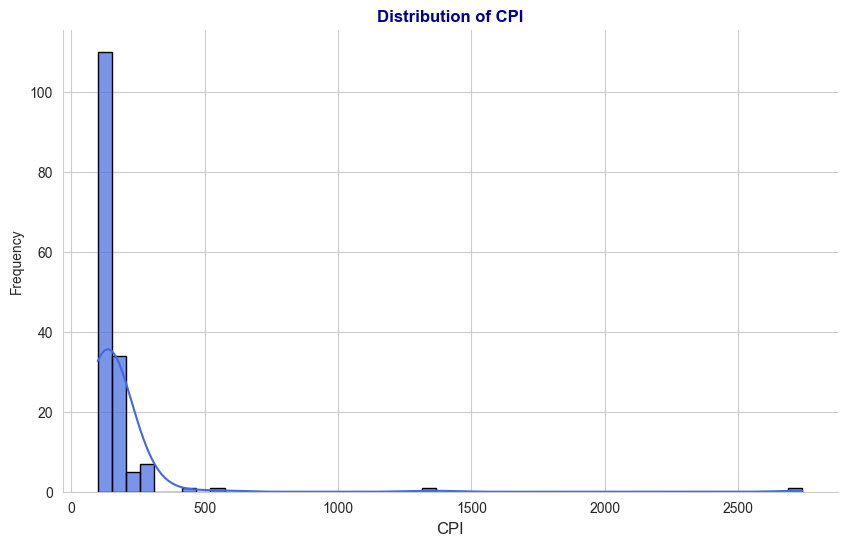

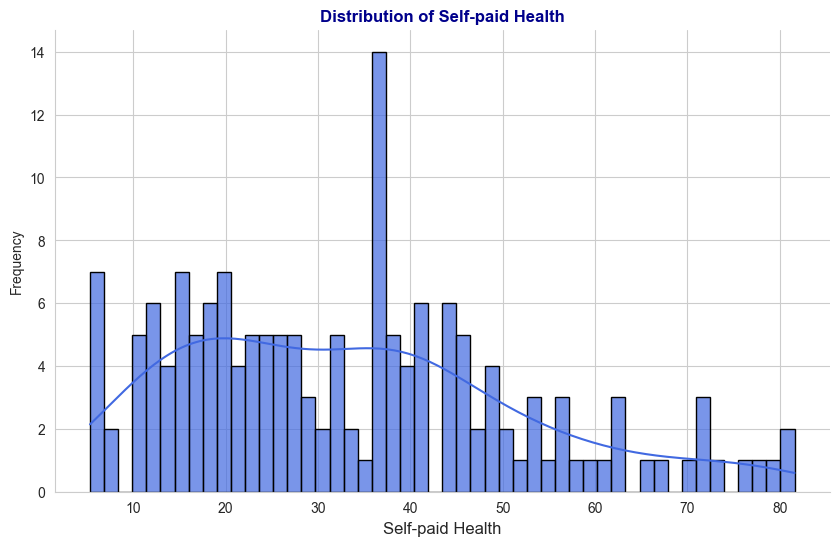

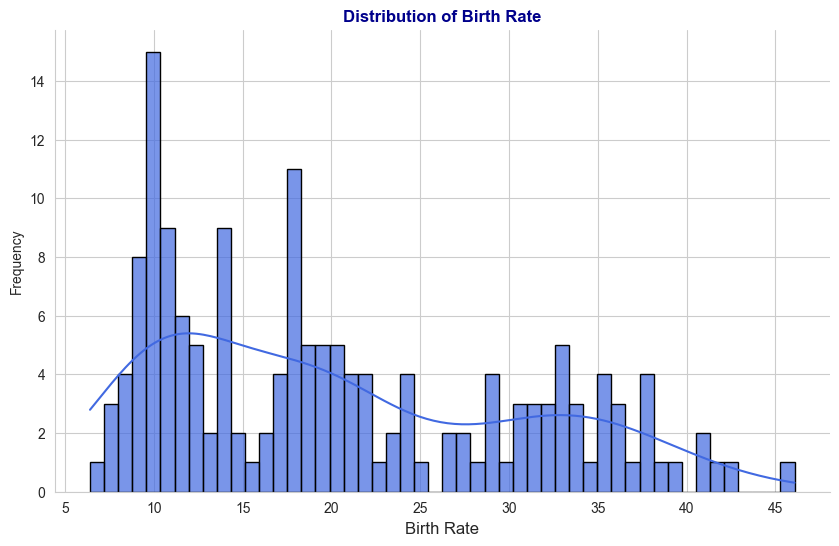

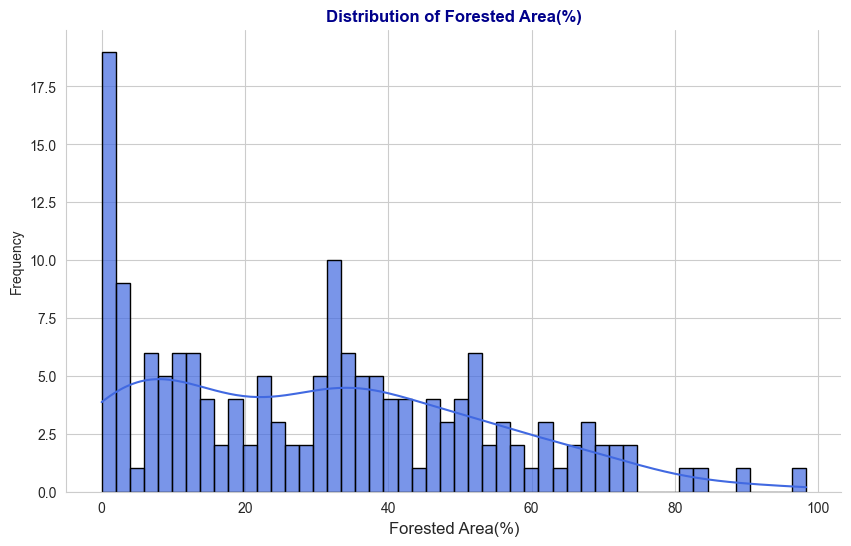

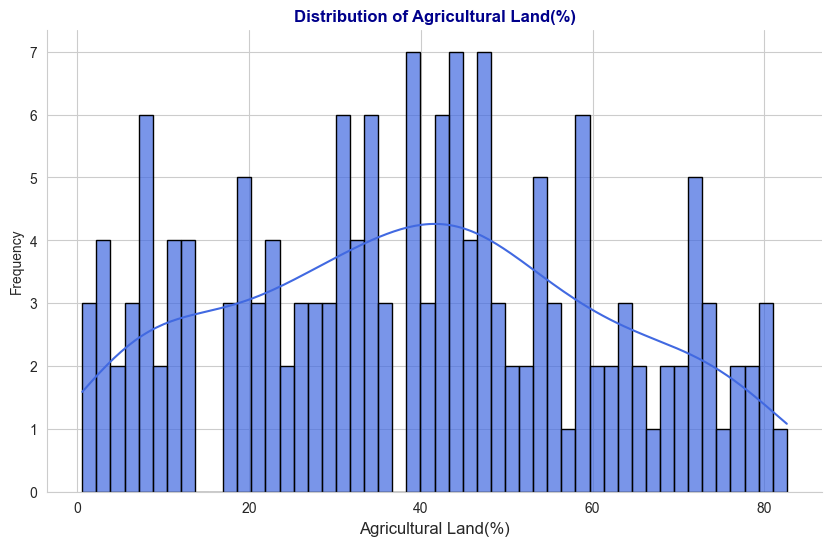

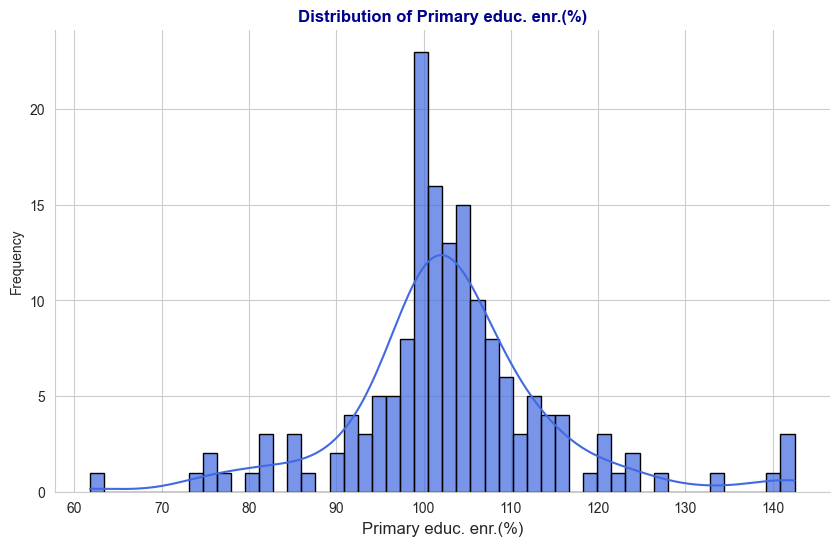

In [35]:
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

sns.set_style("whitegrid")  

for i in dataset.drop('Country', axis=1).columns:
    plt.figure(figsize=(10,6))  
    sns.histplot(dataset[i], kde=True, bins=50, color="royalblue", edgecolor="black", alpha=0.7)
    plt.title(f'Distribution of {i}', fontsize=12, fontweight='bold', color='darkblue')
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Frequency", fontsize=10)
    sns.despine()
    
    clean_name = re.sub(r"[^\w\-_]", "_", i) 
    
    filename = os.path.join(output_dir, f"{clean_name}_distribution.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')  
    
    plt.show()  

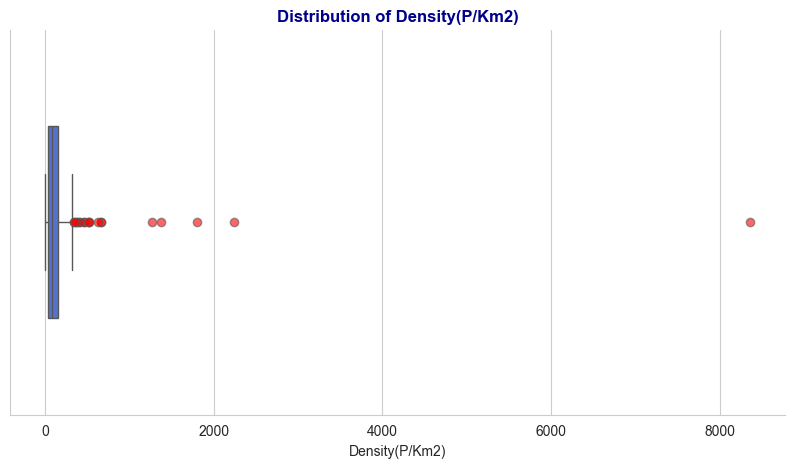

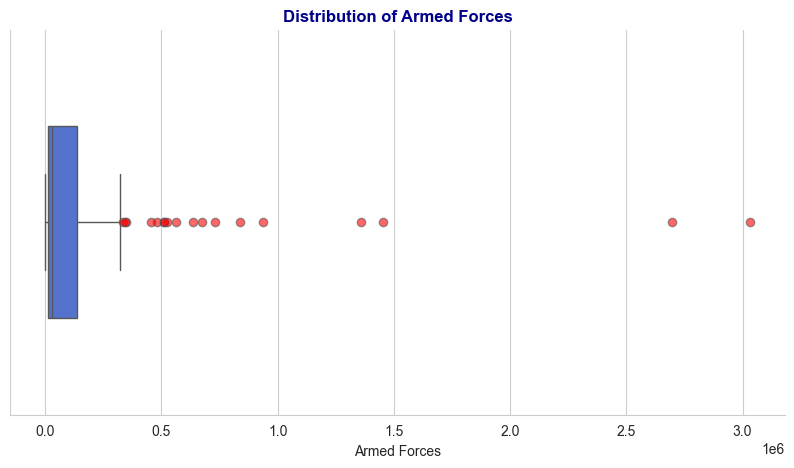

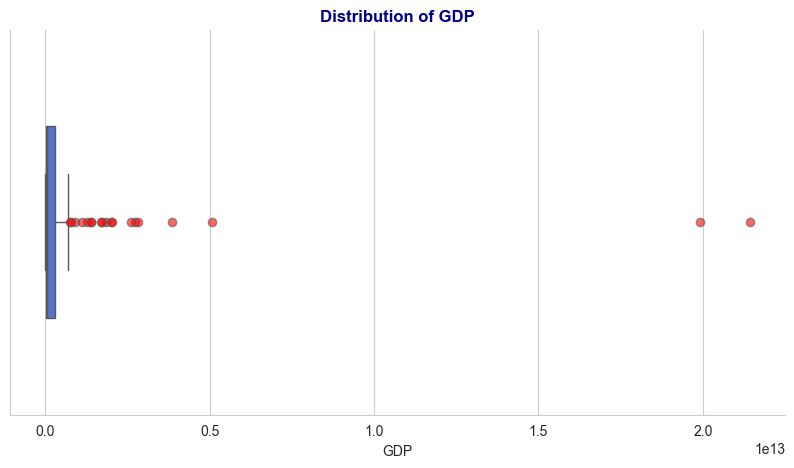

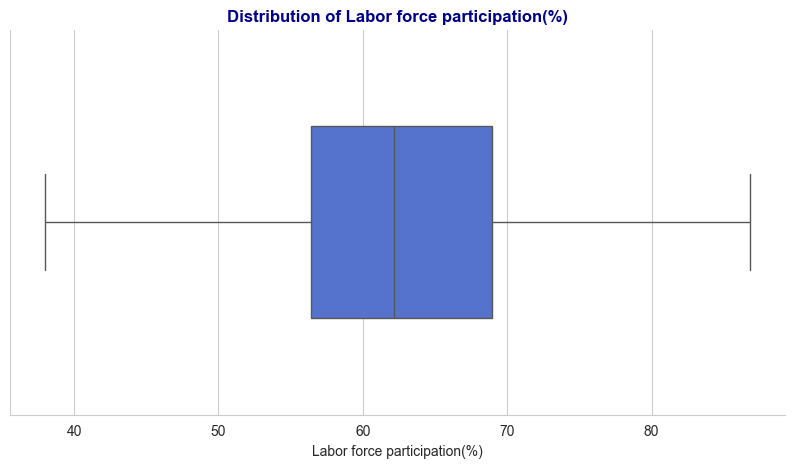

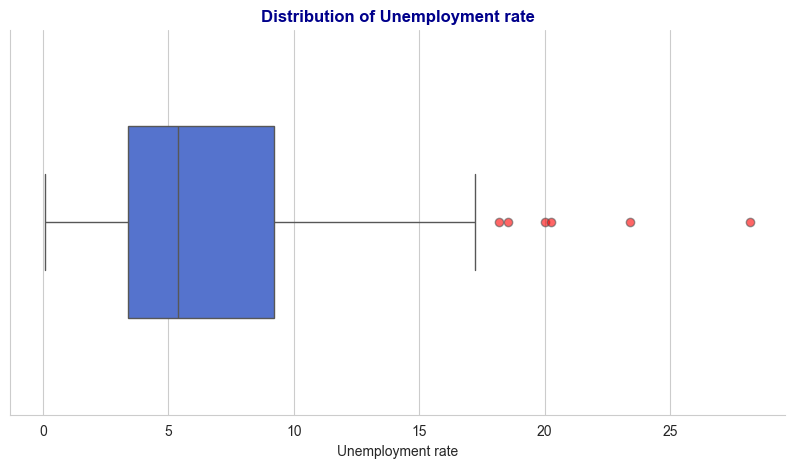

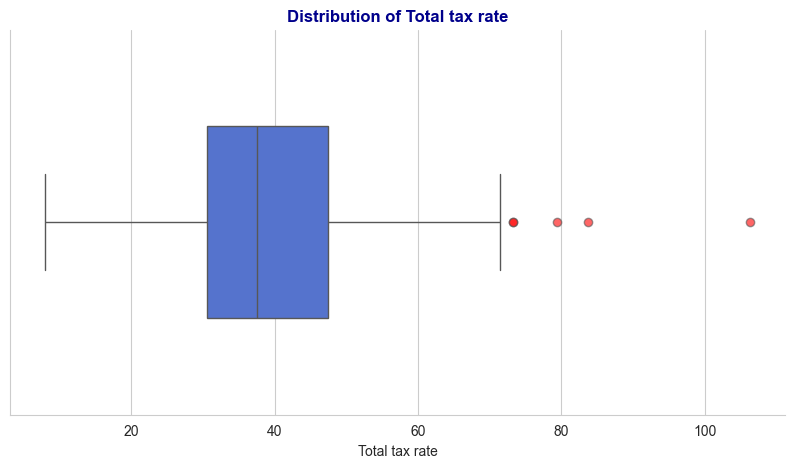

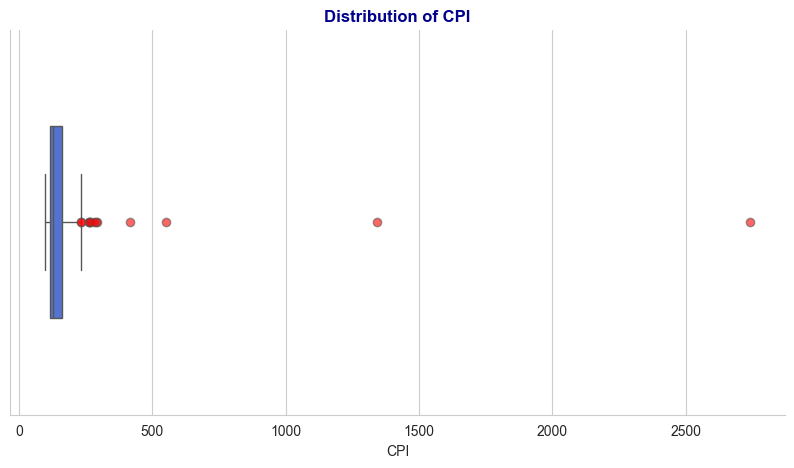

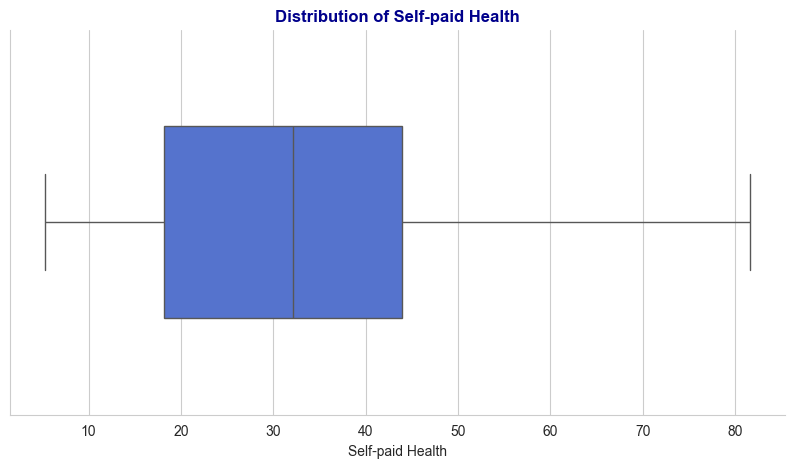

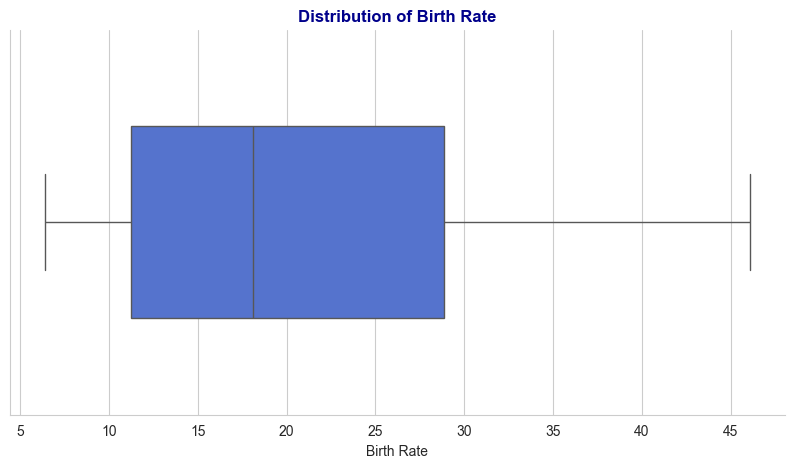

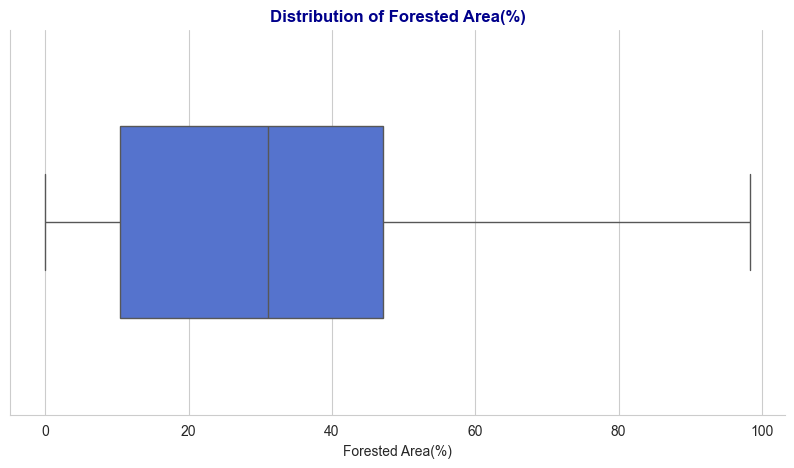

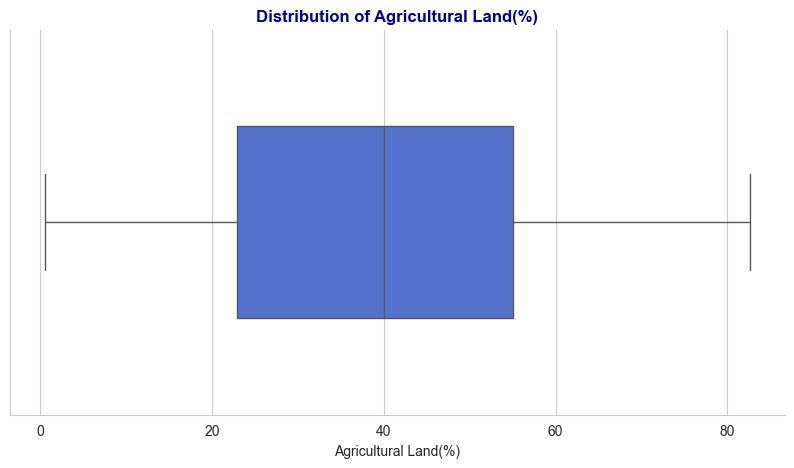

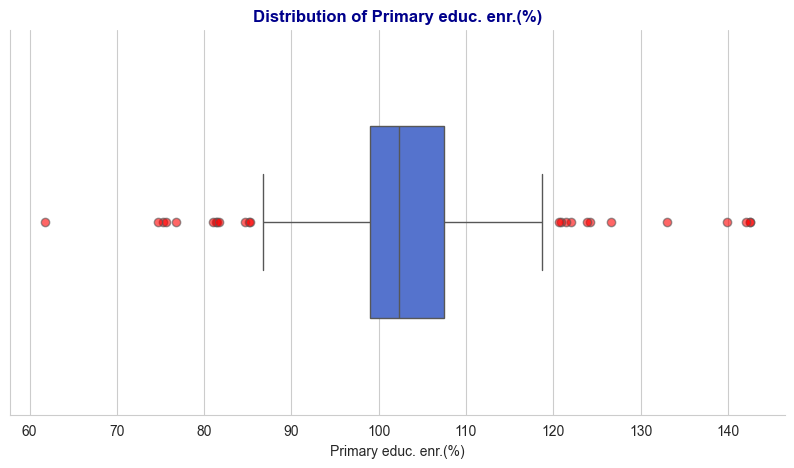

In [36]:
sns.set_style("whitegrid")

for i in dataset.drop('Country', axis=1).columns:
    plt.figure(figsize=(10, 5))  
    sns.boxplot(x=dataset[i], color="royalblue", width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'alpha': 0.6})
    plt.title(f'Distribution of {i}', fontsize=12, fontweight='bold', color='darkblue')
    plt.xlabel(i, fontsize=10)
    sns.despine()
    plt.show()

## outliers detection

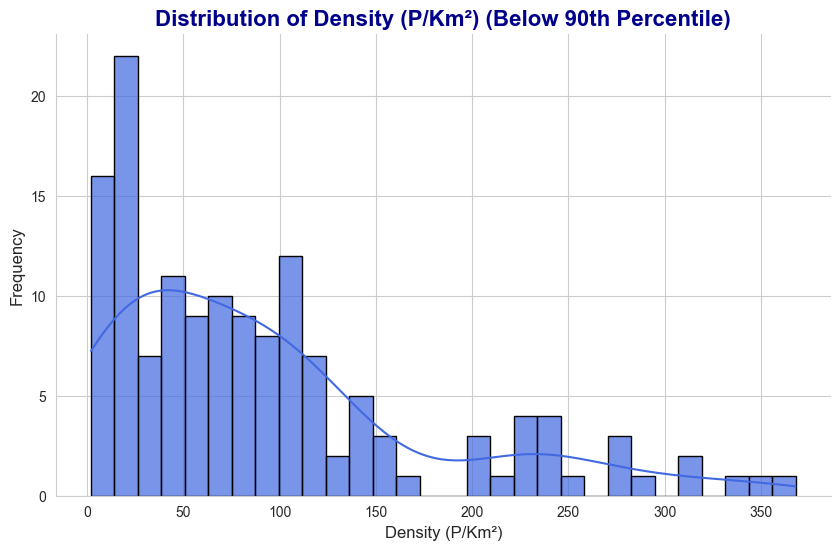

In [37]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.90)]['Density(P/Km2)']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of Density (P/Km²) (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Density (P/Km²)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

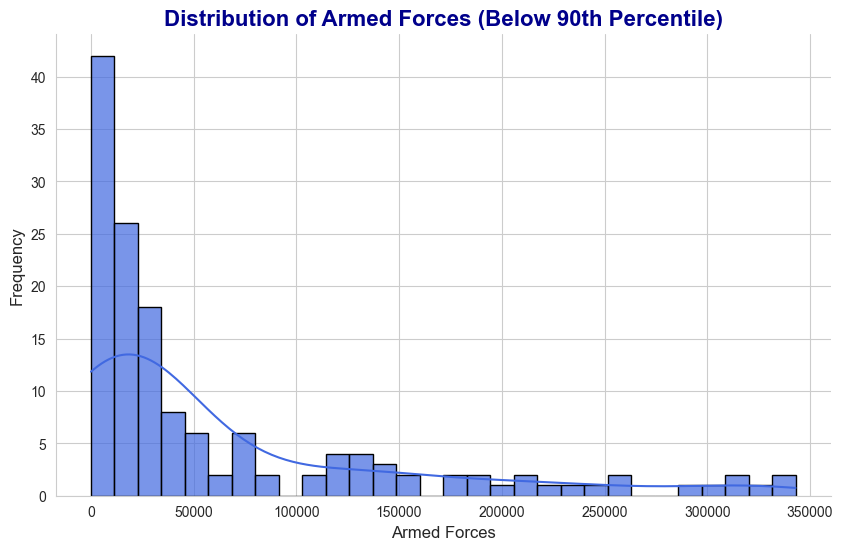

In [38]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.90)]['Armed Forces']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of Armed Forces (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Armed Forces', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

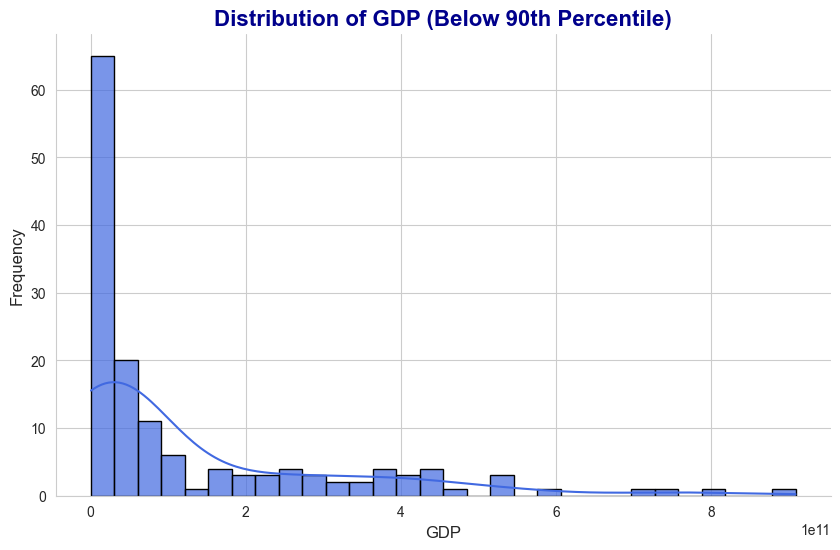

In [39]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['GDP'] < dataset['GDP'].quantile(0.90)]['GDP']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of GDP (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

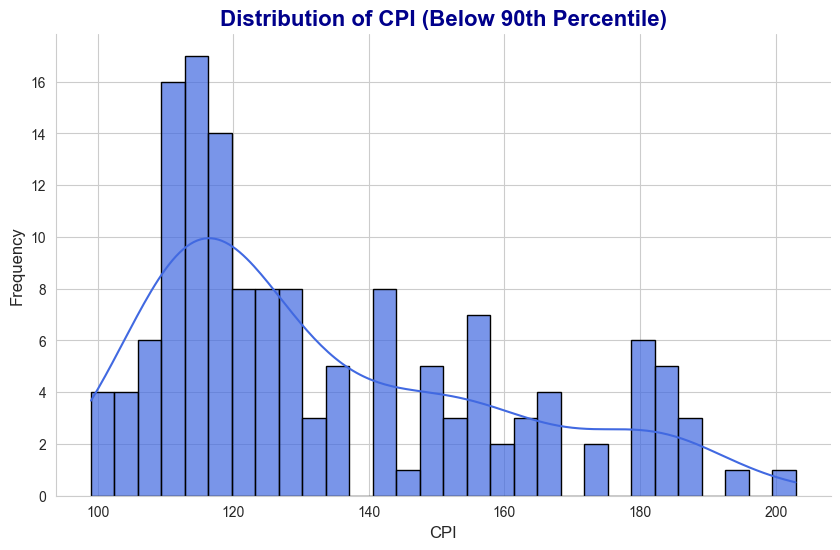

In [40]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['CPI'] < dataset['CPI'].quantile(0.90)]['CPI']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of CPI (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('CPI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

In [41]:
dataset[dataset['Density(P/Km2)'] > dataset['Density(P/Km2)'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
12     Bahrain          2239.0       19000.0  3.857407e+10   
156  Singapore          8358.0       81000.0  3.720625e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
12                           73.4               0.71            13.8  117.59   
156                          70.5               4.11            21.0  114.41   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
12               25.1       13.99               0.8                  11.1   
156              36.7        8.80              23.1                   0.9   

     Primary educ. enr.(%)  
12                    99.4  
156                  100.6

In [42]:
dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
114  Mongolia             2.0       18000.0  1.385285e+10   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
114                          59.7               6.01            25.7  195.76   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
114              39.3       24.13               8.0                  71.5   

     Primary educ. enr.(%)  
114                  104.0

In [43]:
dataset[dataset['Armed Forces'] > dataset['Armed Forces'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
36   China           153.0     2695000.0  1.991000e+13   
77   India           464.0     3031000.0  2.611000e+12   

    Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
36                          68.0               4.32            59.2  125.08   
77                          49.3               5.36            49.7  180.44   

    Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
36              32.4       10.90              22.4                  56.2   
77              65.1       17.86              23.8                  60.4   

    Primary educ. enr.(%)  
36                  100.2  
77                  113.0

In [44]:
dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.01)]

Empty DataFrame
Columns: [Country, Density(P/Km2), Armed Forces, GDP, Labor force participation(%), Unemployment rate, Total tax rate, CPI, Self-paid Health, Birth Rate, Forested Area(%), Agricultural Land(%), Primary educ. enr.(%)]
Index: []

In [45]:
dataset[dataset['GDP'] > dataset['GDP'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
36           China           153.0     2695000.0  1.991000e+13   
186  United States            36.0     1359000.0  2.142770e+13   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
36                           68.0               4.32            59.2  125.08   
186                          62.0              14.70            36.6  117.24   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
36               32.4        10.9              22.4                  56.2   
186              11.1        11.6              33.9                  44.4   

     Primary educ. enr.(%)  
36                   100.2  
186                  101.8

In [46]:
dataset[dataset['GDP'] < dataset['GDP'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
70         Guinea-Bissau            70.0        4000.0  1.340389e+09   
150  São Tomé e Príncipe           228.0        1000.0  4.290166e+08   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
70                           72.0               2.47            45.5  111.65   
150                          57.8              13.37            37.0  185.09   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
70               37.2       35.13              69.8                  58.0   
150              11.7       31.54              55.8                  50.7   

     Primary educ. enr.(%)  
70                   118.7  
150                  106.8

In [47]:
dataset[dataset['CPI'] > dataset['CPI'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
166      Sudan            25.0      124000.0  1.890228e+10   
190  Venezuela            32.0      343000.0  4.823593e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate      CPI  \
166                          48.4              16.53            45.4  1344.19   
190                          59.7               8.80            73.3  2740.27   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
166              63.2       32.18               8.1                  28.7   
190              45.8       17.88              52.7                  24.5   

     Primary educ. enr.(%)  
166                   76.8  
190                   97.2

In [48]:
dataset[dataset['CPI'] < dataset['CPI'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
24        Brunei            83.0        8000.0  1.346942e+10   
169  Switzerland           219.0       21000.0  7.030824e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate    CPI  \
24                           64.7               9.12             8.0  99.03   
169                          68.3               4.58            28.8  99.55   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
24                6.0        14.9              72.1                   2.7   
169              28.3        10.0              31.8                  38.4   

     Primary educ. enr.(%)  
24                   103.2  
169                  105.2

In [49]:
dataset_original = dataset.copy() 

In [50]:
dataset_original.to_csv('dataset_original.csv',index=False) # dataset before log transformation and scaling

## logarithmic trasformations

In [51]:
for i in dataset[['Density(P/Km2)','Armed Forces','GDP','CPI']].columns:
    dataset[i] = np.log1p(dataset[i]) # log(1+x)

In [52]:
dataset

Country  Density(P/Km2)  Armed Forces        GDP  \
0    Afghanistan        4.110874     12.685411  23.673025   
1        Albania        4.663439      9.105091  23.449685   
2        Algeria        2.944439     12.666660  25.858995   
4         Angola        3.295837     11.669938  25.273298   
6      Argentina        2.890372     11.561725  26.831765   
..           ...             ...           ...        ...   
190    Venezuela        3.496508     12.745489  26.901955   
191      Vietnam        5.752573     13.165425  26.291310   
192        Yemen        4.043051     10.596660  24.015927   
193       Zambia        3.258097      9.680406  23.861570   
194     Zimbabwe        3.663562     10.839601  23.788560   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                            48.9              11.12            71.4   
1                            55.7              12.33            36.6   
2                            41.2              11.70            66.1   
4                            77.5               6.89            49.1   
6                            61.3               9.79           106.3   
..                            ...                ...             ...   
190                          59.7               8.80            73.3   
191                          77.4               2.01            37.6   
192                          38.0              12.91            26.6   
193                          74.6              11.43            15.6   
194                          83.1               4.95            31.6   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    5.016617              78.4       32.49               2.1   
1    4.787908              56.9       11.78              28.1   
2    5.026246              28.1       24.28               0.8   
4    5.571127              33.4       40.73              46.3   
6    5.454252              17.6       17.02               9.8   
..        ...               ...         ...               ...   
190  7.916177              45.8       17.88              52.7   
191  5.103032              43.5       16.75              48.1   
192  5.066259              81.0       30.45               1.0   
193  5.362747              27.5       36.19              65.2   
194  4.668239              25.8       30.68              35.5   

     Agricultural Land(%)  Primary educ. enr.(%)  
0                    58.1                  104.0  
1                    43.1                  107.0  
2                    17.4                  109.9  
4                    47.5                  113.5  
6                    54.3                  109.7  
..                    ...                    ...  
190                  24.5                   97.2  
191                  39.3                  110.6  
192                  44.6                   93.6  
193                  32.1                   98.7  
194                  41.9                  109.9  

[160 rows x 13 columns]

In [53]:
dataset_original

Country  Density(P/Km2)  Armed Forces           GDP  \
0    Afghanistan            60.0      323000.0  1.910135e+10   
1        Albania           105.0        9000.0  1.527808e+10   
2        Algeria            18.0      317000.0  1.699882e+11   
4         Angola            26.0      117000.0  9.463542e+10   
6      Argentina            17.0      105000.0  4.496634e+11   
..           ...             ...           ...           ...   
190    Venezuela            32.0      343000.0  4.823593e+11   
191      Vietnam           314.0      522000.0  2.619212e+11   
192        Yemen            56.0       40000.0  2.691440e+10   
193       Zambia            25.0       16000.0  2.306472e+10   
194     Zimbabwe            38.0       51000.0  2.144076e+10   

     Labor force participation(%)  Unemployment rate  Total tax rate      CPI  \
0                            48.9              11.12            71.4   149.90   
1                            55.7              12.33            36.6   119.05   
2                            41.2              11.70            66.1   151.36   
4                            77.5               6.89            49.1   261.73   
6                            61.3               9.79           106.3   232.75   
..                            ...                ...             ...      ...   
190                          59.7               8.80            73.3  2740.27   
191                          77.4               2.01            37.6   163.52   
192                          38.0              12.91            26.6   157.58   
193                          74.6              11.43            15.6   212.31   
194                          83.1               4.95            31.6   105.51   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0                78.4       32.49               2.1                  58.1   
1                56.9       11.78              28.1                  43.1   
2                28.1       24.28               0.8                  17.4   
4                33.4       40.73              46.3                  47.5   
6                17.6       17.02               9.8                  54.3   
..                ...         ...               ...                   ...   
190              45.8       17.88              52.7                  24.5   
191              43.5       16.75              48.1                  39.3   
192              81.0       30.45               1.0                  44.6   
193              27.5       36.19              65.2                  32.1   
194              25.8       30.68              35.5                  41.9   

     Primary educ. enr.(%)  
0                    104.0  
1                    107.0  
2                    109.9  
4                    113.5  
6                    109.7  
..                     ...  
190                   97.2  
191                  110.6  
192                   93.6  
193                   98.7  
194                  109.9  

[160 rows x 13 columns]

In [54]:
dataset_original[['Country','Density(P/Km2)']].sort_values(by='Density(P/Km2)',ascending=False)

Country  Density(P/Km2)
156   Singapore          8358.0
12      Bahrain          2239.0
104    Maldives          1802.0
106       Malta          1380.0
13   Bangladesh          1265.0
..          ...             ...
167    Suriname             4.0
8     Australia             3.0
76      Iceland             3.0
119     Namibia             3.0
114    Mongolia             2.0

[160 rows x 2 columns]

In [55]:
dataset_original[['Country','Labor force participation(%)']].sort_values(by='Labor force participation(%)',ascending=False)

Country  Labor force participation(%)
141       Qatar                          86.8
101  Madagascar                          86.1
121       Nepal                          83.8
144      Rwanda                          83.7
172    Tanzania                          83.4
..          ...                           ...
80         Iraq                          43.0
171  Tajikistan                          42.0
2       Algeria                          41.2
86       Jordan                          39.3
192       Yemen                          38.0

[160 rows x 2 columns]

In [56]:
dataset_original[['Country','GDP']].sort_values(by='GDP',ascending=False)

Country           GDP
186        United States  2.142770e+13
36                 China  1.991000e+13
85                 Japan  5.081770e+12
64               Germany  3.845630e+12
185       United Kingdom  2.827113e+12
..                   ...           ...
17                Belize  1.879614e+09
62            The Gambia  1.763819e+09
174           East Timor  1.673540e+09
70         Guinea-Bissau  1.340389e+09
150  São Tomé e Príncipe  4.290166e+08

[160 rows x 2 columns]

In [57]:
dataset_original[['Country','Unemployment rate']].sort_values(by='Unemployment rate',ascending=False)

Country  Unemployment rate
161  South Africa              28.18
95        Lesotho              23.41
119       Namibia              20.27
61          Gabon              20.00
97          Libya              18.56
..            ...                ...
12        Bahrain               0.71
30       Cambodia               0.68
92           Laos               0.63
125         Niger               0.47
141         Qatar               0.09

[160 rows x 2 columns]

In [58]:
dataset_original[['Country','Total tax rate']].sort_values(by='Total tax rate',ascending=False)

Country  Total tax rate
6                   Argentina           106.3
20                    Bolivia            83.7
53          Equatorial Guinea            79.4
190                 Venezuela            73.3
33   Central African Republic            73.3
..                        ...             ...
95                    Lesotho            13.6
90                     Kuwait            13.0
141                     Qatar            11.3
63                    Georgia             9.9
24                     Brunei             8.0

[160 rows x 2 columns]

In [59]:
dataset_original['Total tax rate'].mean()

39.821875

In [60]:
dataset_original[['Country','CPI']].sort_values(by='CPI',ascending=False)

Country      CPI
190    Venezuela  2740.27
166        Sudan  1344.19
79          Iran   550.93
102       Malawi   418.34
167     Suriname   294.66
..           ...      ...
43        Cyprus   102.51
66        Greece   101.87
104     Maldives    99.70
169  Switzerland    99.55
24        Brunei    99.03

[160 rows x 2 columns]

In [61]:
dataset_original[['Country','Self-paid Health']].sort_values(by='Self-paid Health',ascending=False)

Country  Self-paid Health
7             Armenia              81.6
192             Yemen              81.0
10         Azerbaijan              78.6
0         Afghanistan              78.4
80               Iraq              76.5
..                ...               ...
130              Oman               6.4
141             Qatar               6.2
24             Brunei               6.0
135  Papua New Guinea               5.8
22           Botswana               5.3

[160 rows x 2 columns]

In [62]:
dataset_original[['Country','Birth Rate']].sort_values(by='Birth Rate',ascending=False)

Country  Birth Rate
125                             Niger       46.08
34                               Chad       42.17
105                              Mali       41.54
45   Democratic Republic of the Congo       41.18
4                              Angola       40.73
..                                ...         ...
66                             Greece        8.10
164                             Spain        7.90
85                              Japan        7.40
83                              Italy        7.30
162                       South Korea        6.40

[160 rows x 2 columns]

In [63]:
dataset_original[['Country','Forested Area(%)']].sort_values(by='Forested Area(%)',ascending=False)

Country  Forested Area(%)
167          Suriname              98.3
61              Gabon              90.0
71             Guyana              83.9
92               Laos              82.1
135  Papua New Guinea              74.1
..                ...               ...
108        Mauritania               0.2
97              Libya               0.1
51              Egypt               0.1
141             Qatar               0.0
130              Oman               0.0

[160 rows x 2 columns]

In [64]:
dataset_original[['Country','Agricultural Land(%)']].sort_values(by='Agricultural Land(%)',ascending=False)

Country  Agricultural Land(%)
187           Uruguay                  82.6
151      Saudi Arabia                  80.8
87         Kazakhstan                  80.4
161      South Africa                  79.8
27            Burundi                  79.2
..                ...                   ...
24             Brunei                   2.7
135  Papua New Guinea                   2.6
11        The Bahamas                   1.4
156         Singapore                   0.9
167          Suriname                   0.6

[160 rows x 2 columns]

In [65]:
dataset_original[['Country','Primary educ. enr.(%)']].sort_values(by='Primary educ. enr.(%)',ascending=False)

Country  Primary educ. enr.(%)
102             Malawi                  142.5
101         Madagascar                  142.5
121              Nepal                  142.1
61               Gabon                  139.9
144             Rwanda                  133.0
..                 ...                    ...
166              Sudan                   76.8
105               Mali                   75.6
47            Djibouti                   75.3
125              Niger                   74.7
53   Equatorial Guinea                   61.8

[160 rows x 2 columns]

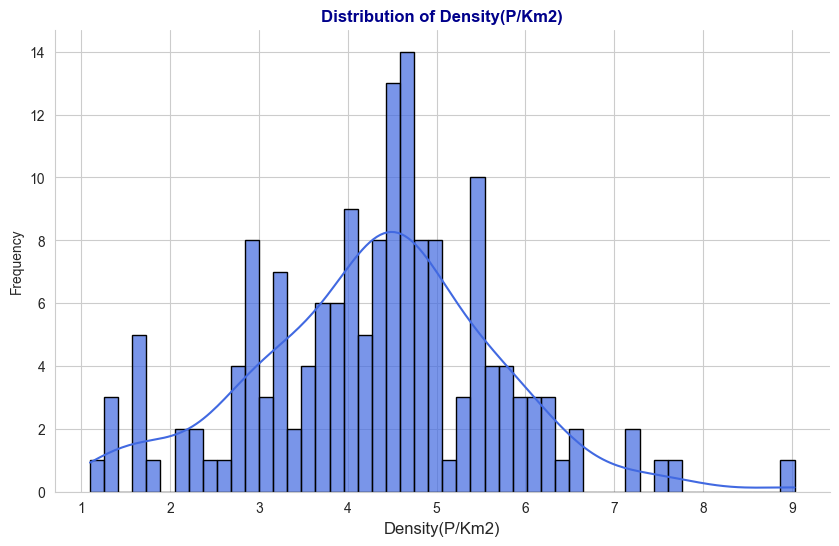

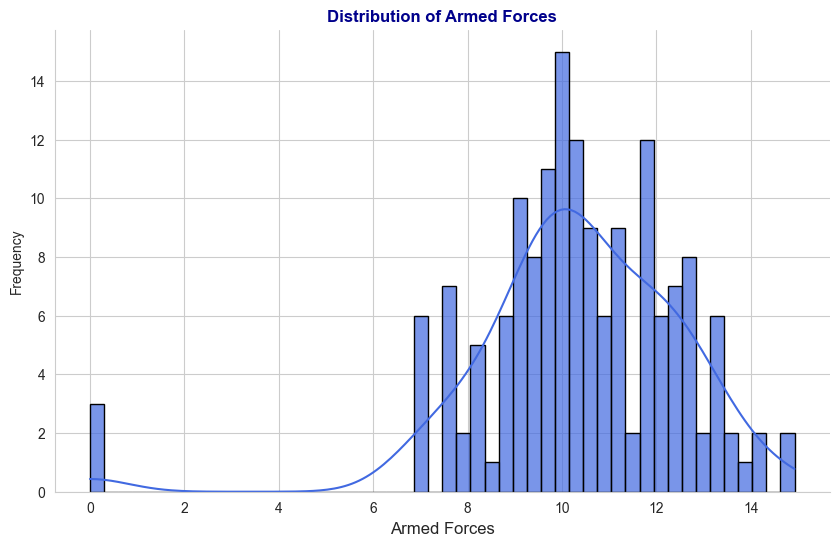

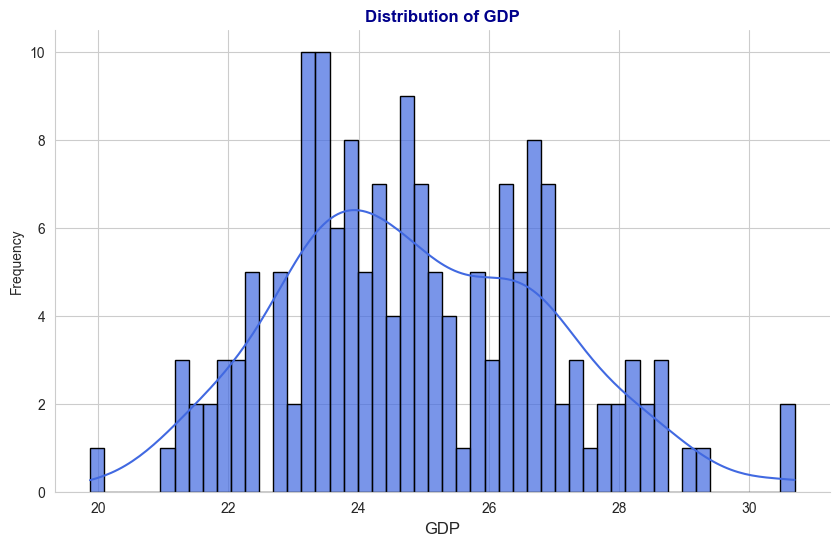

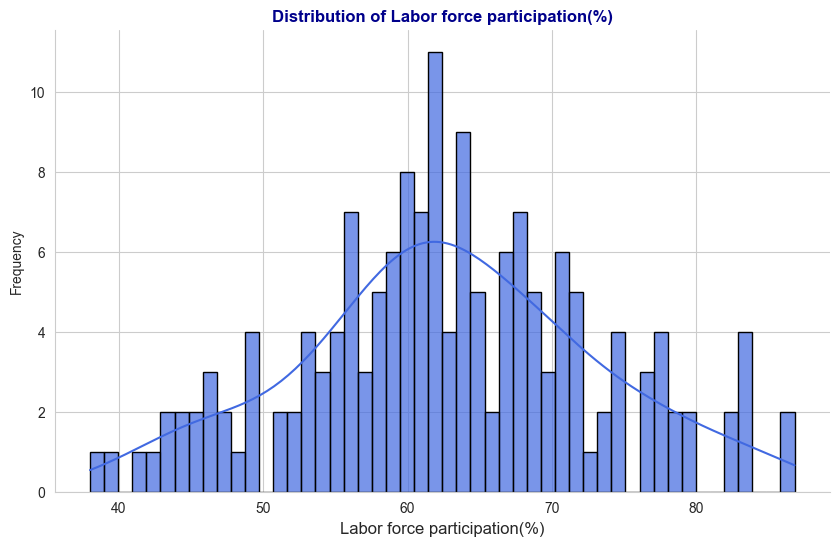

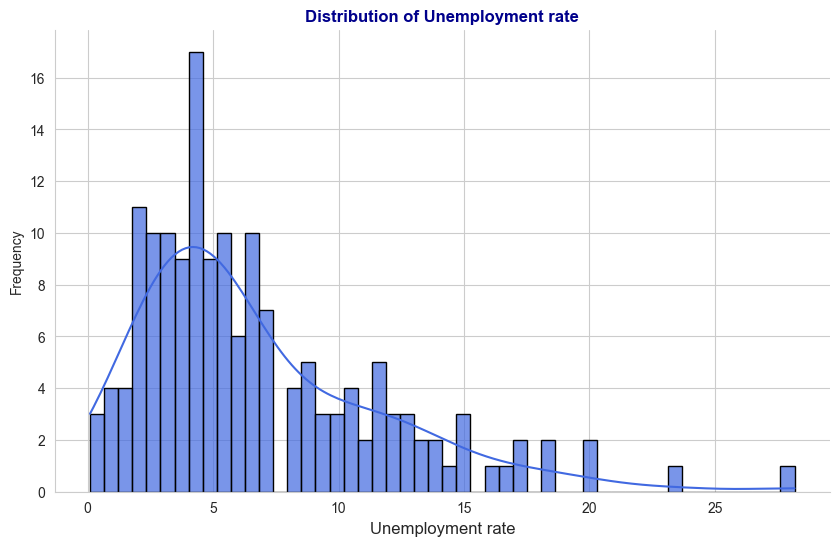

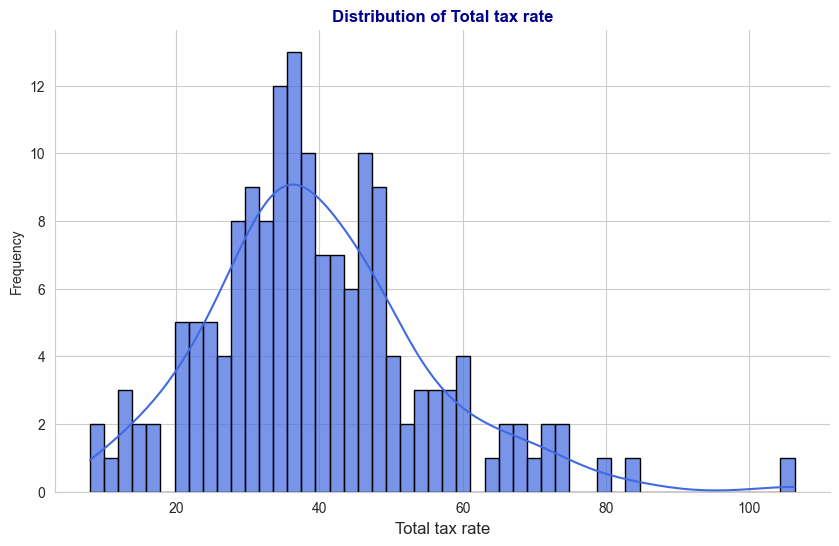

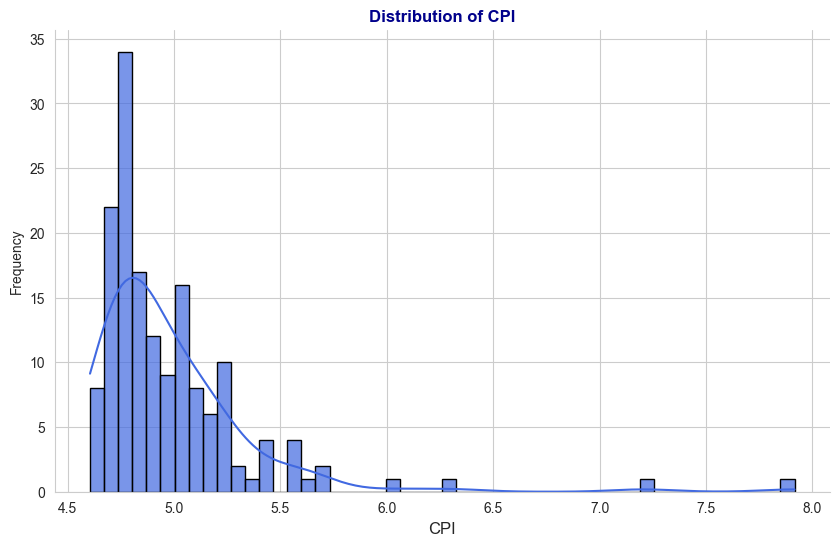

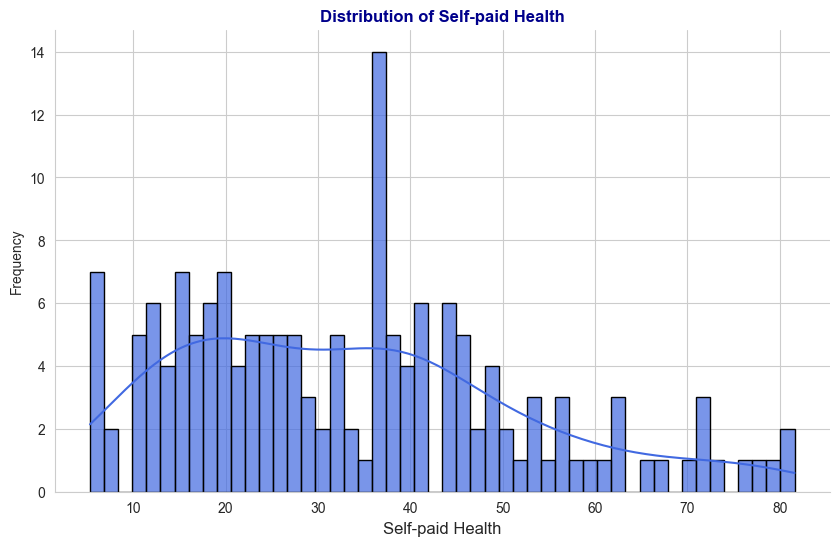

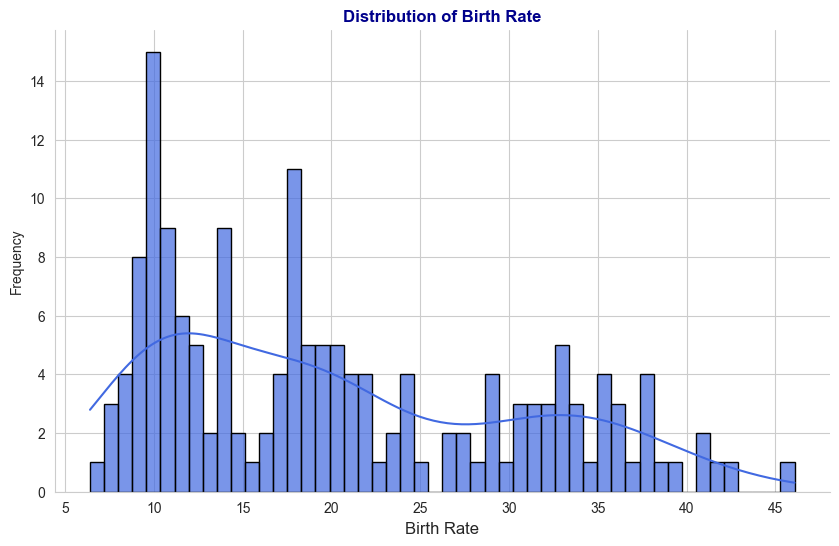

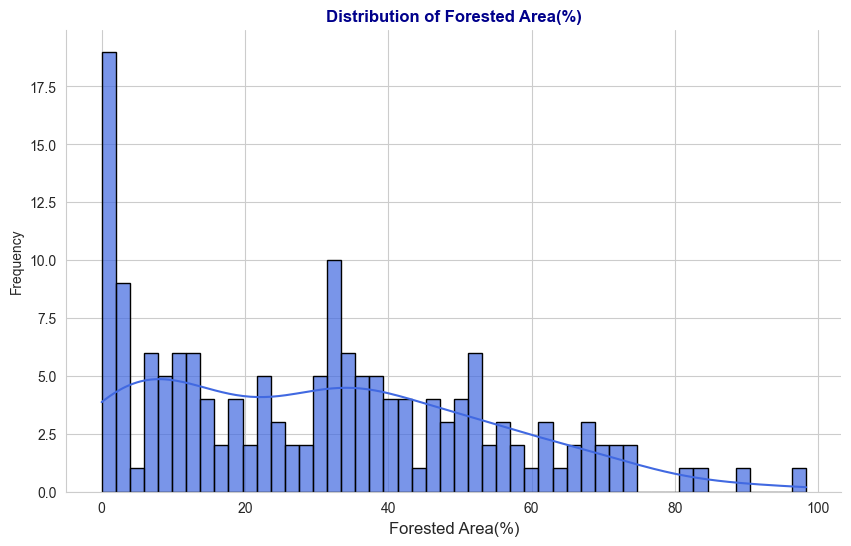

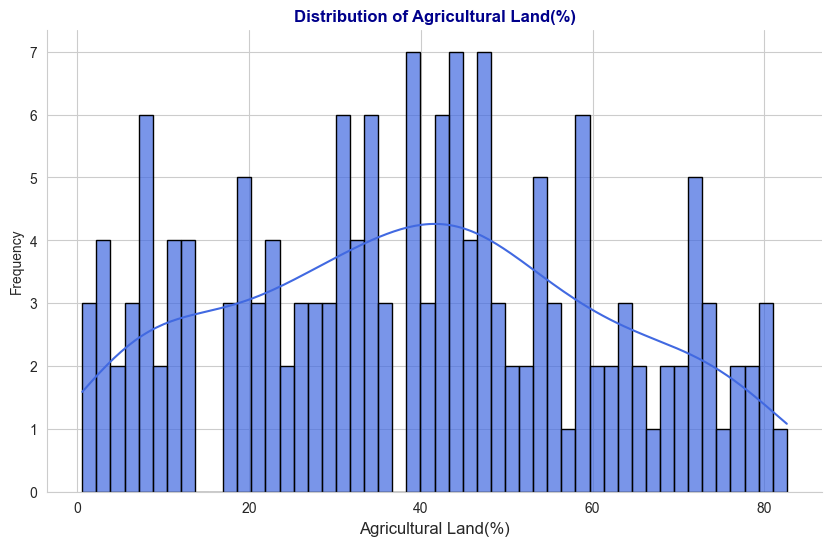

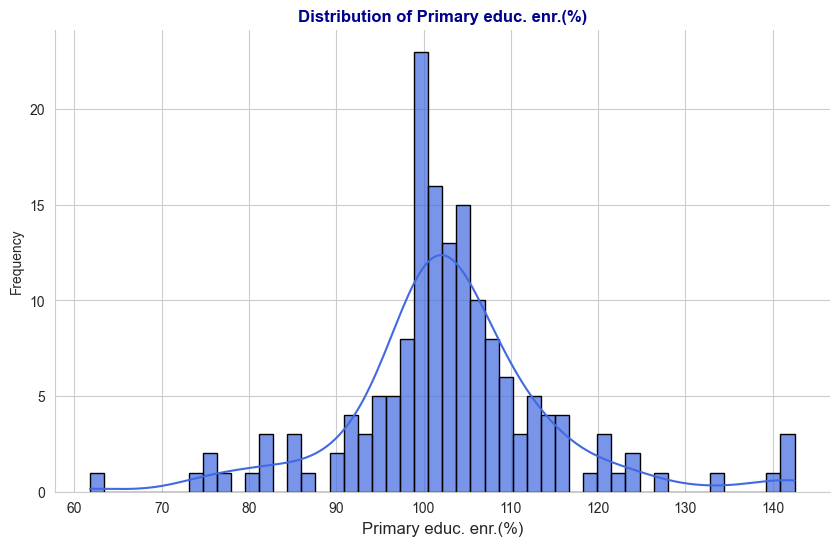

In [66]:
output_dir = "plots_log" 
os.makedirs(output_dir, exist_ok=True)

sns.set_style("whitegrid")   

for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(10,6))  
    sns.histplot(dataset[i],kde=True,bins=50,color="royalblue",edgecolor="black",alpha=0.7)
    plt.title(f'Distribution of {i}',fontsize=12,fontweight='bold',color='darkblue')
    plt.xlabel(i,fontsize=12)
    plt.ylabel("Frequency",fontsize=10)
    sns.despine()

    clean_name = re.sub(r"[^\w\-_]", "_", i) 
    filename = os.path.join(output_dir, f"{clean_name}_distribution.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')  
    
    plt.show() 

In [67]:
dataset.to_csv("dataset.csv",index=False) # dataset after log transformation but before scaling

## data normalization

In [68]:
scaler = MinMaxScaler()

In [69]:
dataset_scaled = scaler.fit_transform(dataset.drop('Country',axis=1))

In [70]:
dataset_scaled = pd.DataFrame(dataset_scaled,columns=dataset.drop('Country',axis=1).columns)

In [71]:
dataset_scaled

Density(P/Km2)  Armed Forces       GDP  Labor force participation(%)  \
0          0.379738      0.849978  0.350876                      0.223361   
1          0.449396      0.610081  0.330232                      0.362705   
2          0.232692      0.848721  0.552931                      0.065574   
3          0.276991      0.781937  0.498793                      0.809426   
4          0.225876      0.774686  0.642846                      0.477459   
..              ...           ...       ...                           ...   
155        0.302288      0.854003  0.649334                      0.444672   
156        0.586697      0.882141  0.592890                      0.807377   
157        0.371188      0.710022  0.382571                      0.000000   
158        0.272233      0.648629  0.368303                      0.750000   
159        0.323348      0.726300  0.361555                      0.924180   

     Unemployment rate  Total tax rate       CPI  Self-paid Health  \
0             0.392666        0.644964  0.124187          0.958060   
1             0.435742        0.290946  0.055106          0.676278   
2             0.413314        0.591048  0.127096          0.298820   
3             0.242079        0.418108  0.291677          0.368283   
4             0.345319        1.000000  0.256375          0.161206   
..                 ...             ...       ...               ...   
155           0.310075        0.664293  1.000000          0.530799   
156           0.068352        0.301119  0.150289          0.500655   
157           0.456390        0.189217  0.139181          0.992136   
158           0.403702        0.077314  0.228736          0.290957   
159           0.173015        0.240081  0.018959          0.268676   

     Birth Rate  Forested Area(%)  Agricultural Land(%)  Primary educ. enr.(%)  
0      0.657510          0.021363              0.701220               0.522924  
1      0.135585          0.285860              0.518293               0.560099  
2      0.450605          0.008138              0.204878               0.596035  
3      0.865171          0.471007              0.571951               0.640644  
4      0.267641          0.099695              0.654878               0.593556  
..          ...               ...                   ...                    ...  
155    0.289315          0.536114              0.291463               0.438662  
156    0.260837          0.489318              0.471951               0.604709  
157    0.606099          0.010173              0.536585               0.394052  
158    0.750756          0.663276              0.384146               0.457249  
159    0.611895          0.361139              0.503659               0.596035  

[160 rows x 12 columns]

In [72]:
dataset_scaled.insert(0,'Country',dataset['Country'].values)

In [73]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.350876   
1        Albania        0.449396      0.610081  0.330232   
2        Algeria        0.232692      0.848721  0.552931   
3         Angola        0.276991      0.781937  0.498793   
4      Argentina        0.225876      0.774686  0.642846   
..           ...             ...           ...       ...   
155    Venezuela        0.302288      0.854003  0.649334   
156      Vietnam        0.586697      0.882141  0.592890   
157        Yemen        0.371188      0.710022  0.382571   
158       Zambia        0.272233      0.648629  0.368303   
159     Zimbabwe        0.323348      0.726300  0.361555   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
155                      0.444672           0.310075        0.664293   
156                      0.807377           0.068352        0.301119   
157                      0.000000           0.456390        0.189217   
158                      0.750000           0.403702        0.077314   
159                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
155  1.000000          0.530799    0.289315          0.536114   
156  0.150289          0.500655    0.260837          0.489318   
157  0.139181          0.992136    0.606099          0.010173   
158  0.228736          0.290957    0.750756          0.663276   
159  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)  
0                0.701220               0.522924  
1                0.518293               0.560099  
2                0.204878               0.596035  
3                0.571951               0.640644  
4                0.654878               0.593556  
..                    ...                    ...  
155              0.291463               0.438662  
156              0.471951               0.604709  
157              0.536585               0.394052  
158              0.384146               0.457249  
159              0.503659               0.596035  

[160 rows x 13 columns]

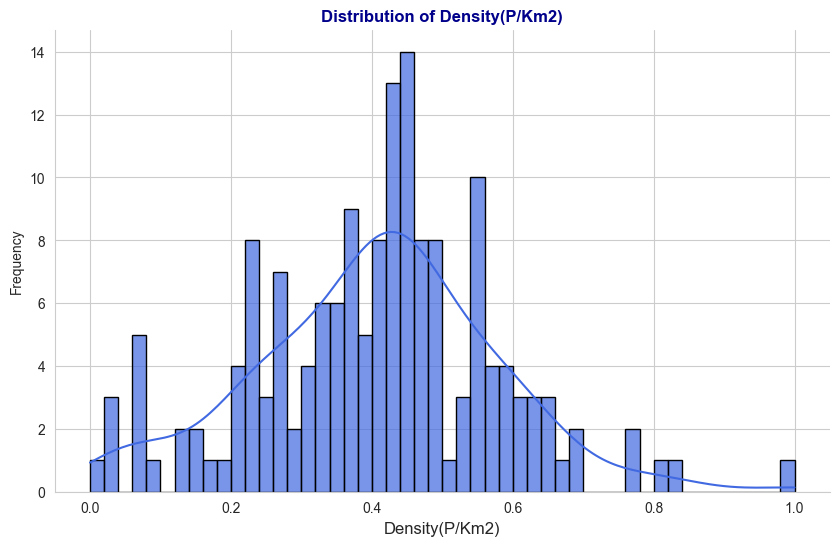

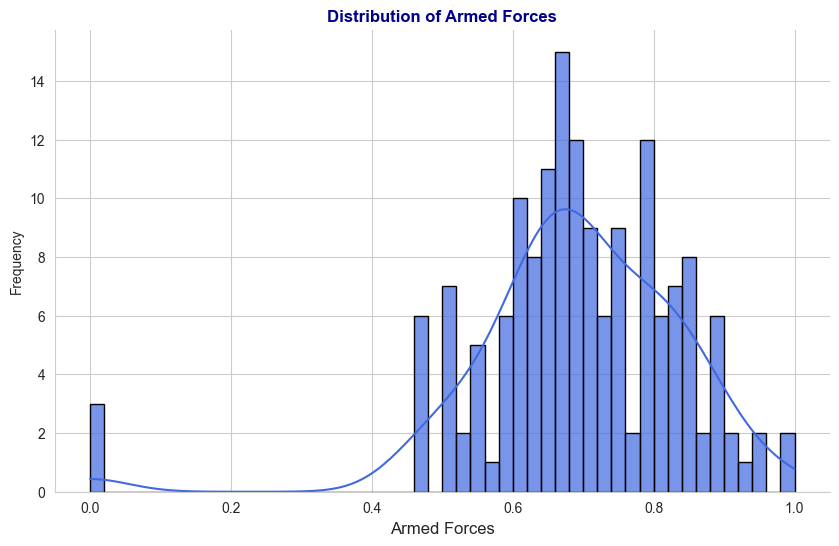

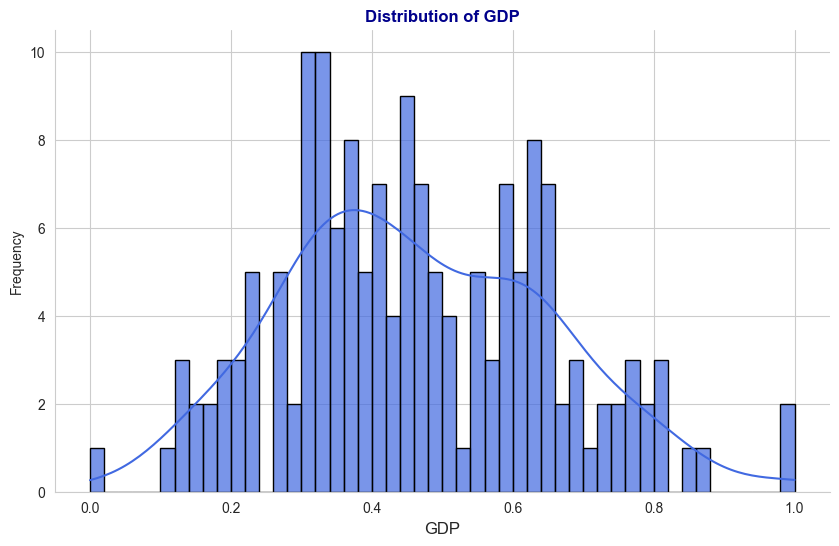

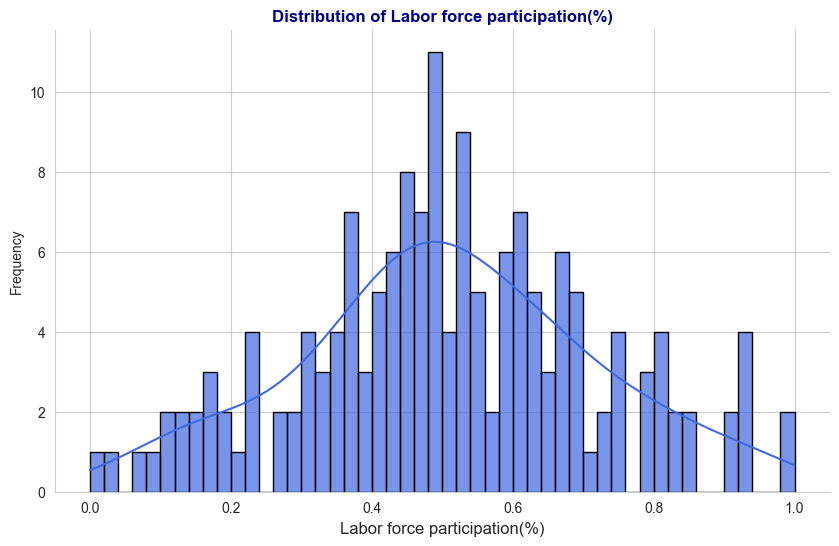

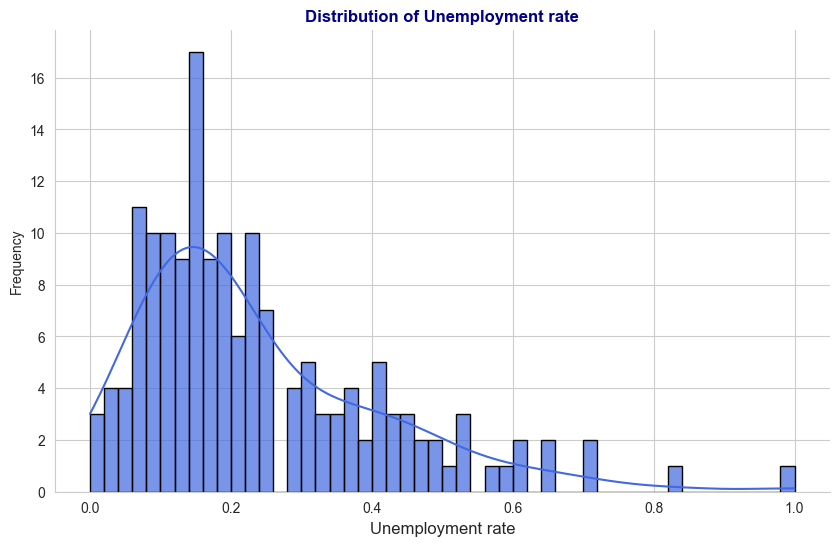

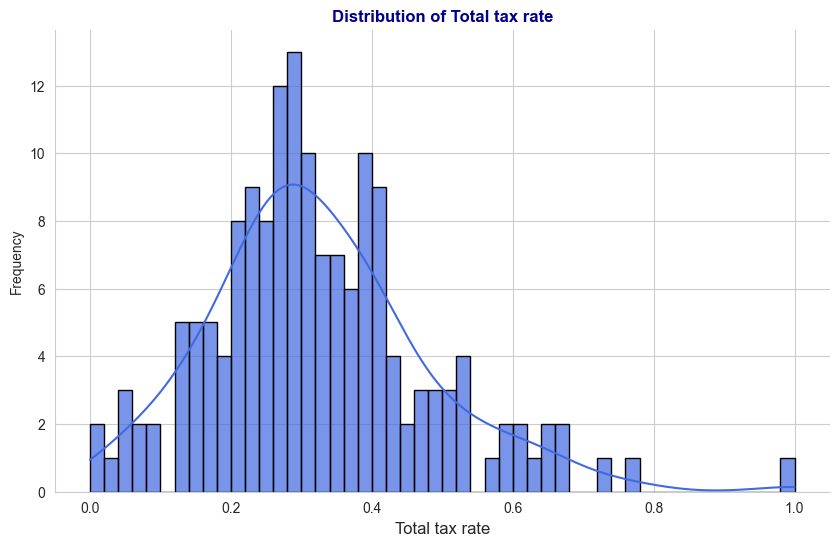

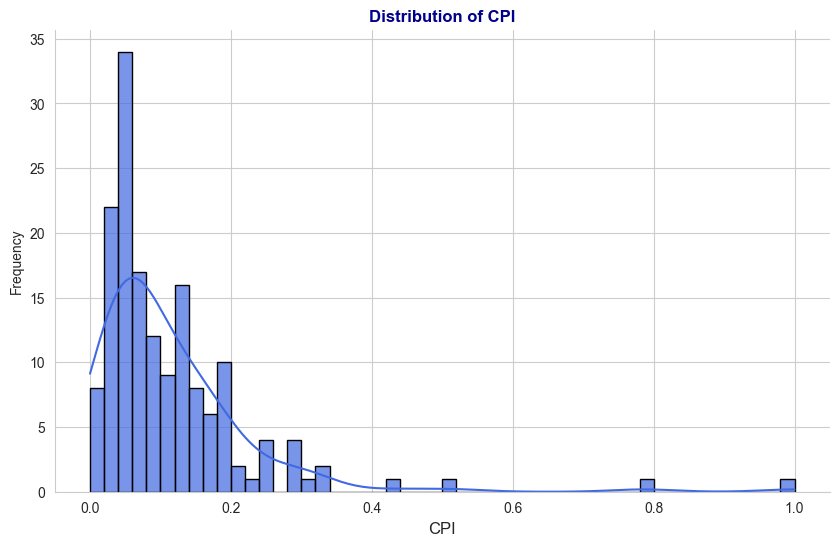

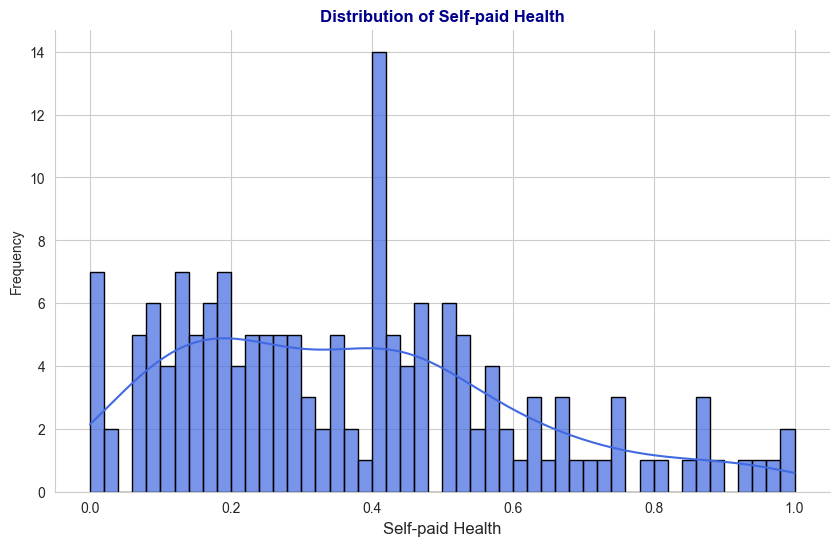

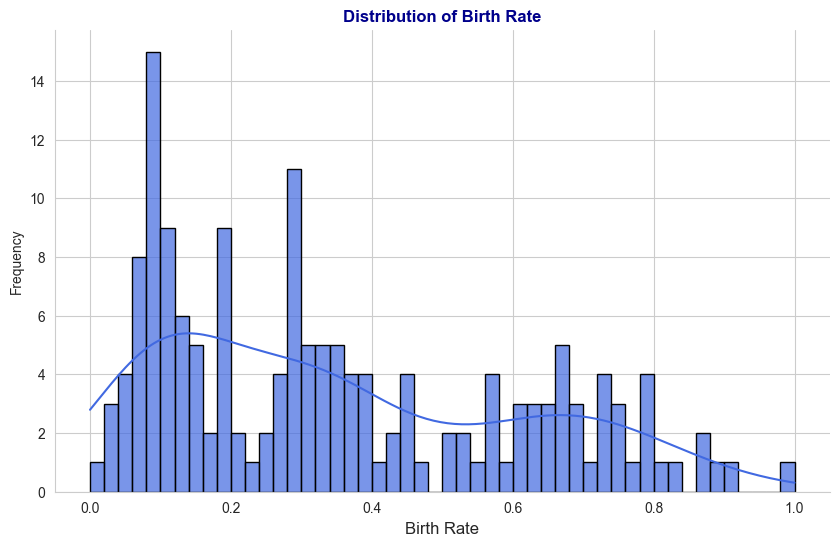

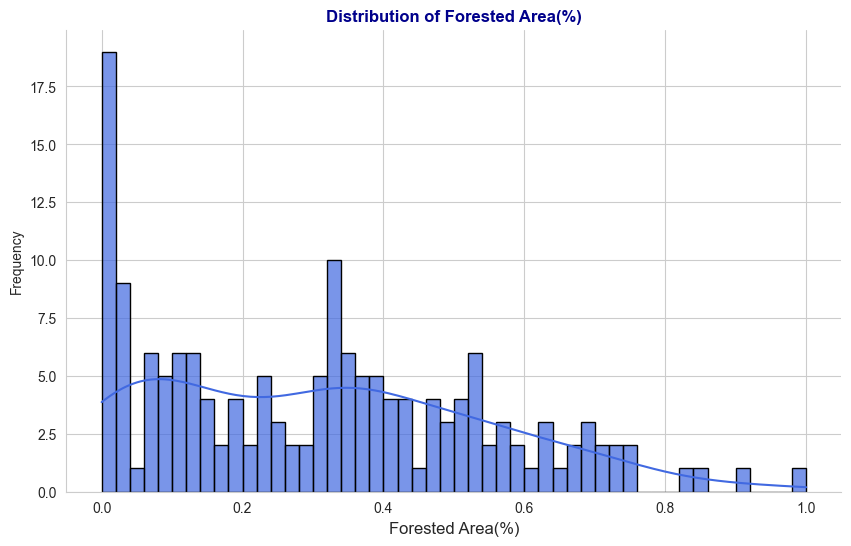

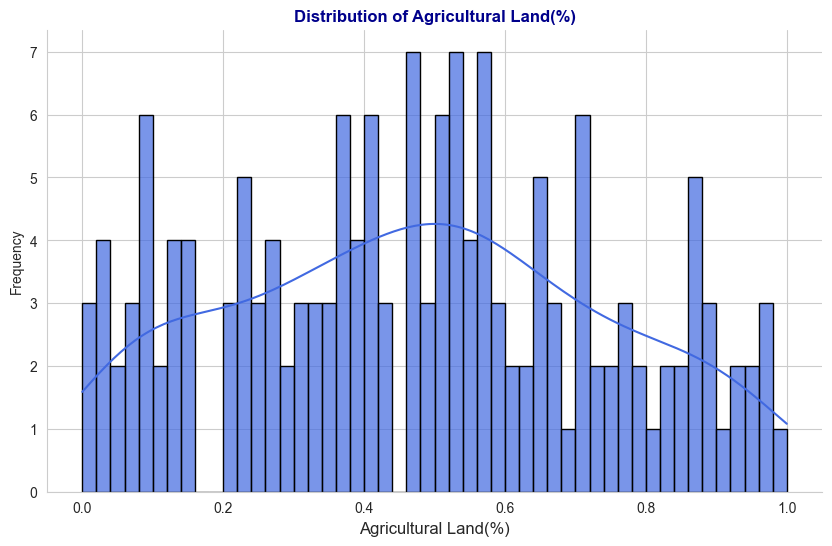

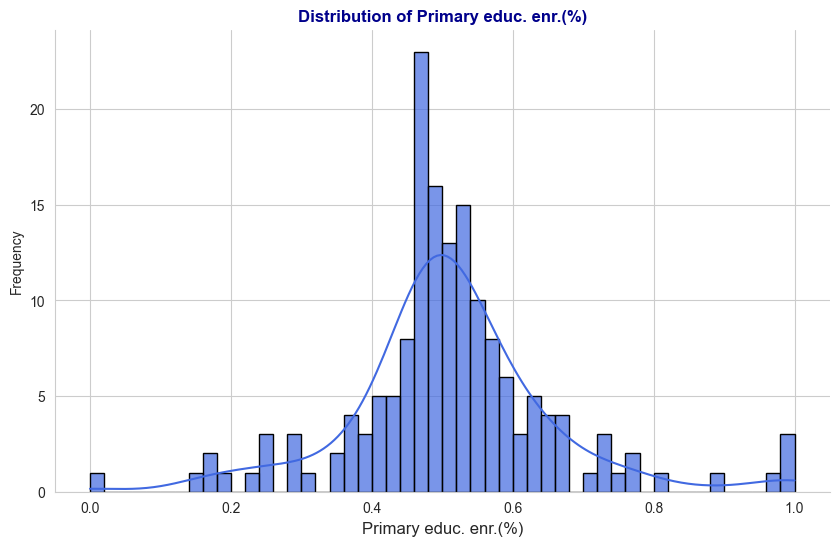

In [74]:
output_dir = "plots_scaled" 
os.makedirs(output_dir, exist_ok=True)

sns.set_style("whitegrid")  

for i in dataset_scaled.drop('Country', axis=1).columns:
    plt.figure(figsize=(10,6))  
    sns.histplot(dataset_scaled[i], kde=True, bins=50, color="royalblue", edgecolor="black", alpha=0.7)
    plt.title(f'Distribution of {i}', fontsize=12, fontweight='bold', color='darkblue')
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Frequency", fontsize=10)
    sns.despine()

    clean_name = re.sub(r"[^\w\-_]", "_", i) 
    filename = os.path.join(output_dir, f"{clean_name}_distribution.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')  
    
    plt.show() 

## plots

In [75]:
dataset_scaled.head()

Country  Density(P/Km2)  Armed Forces       GDP  \
0  Afghanistan        0.379738      0.849978  0.350876   
1      Albania        0.449396      0.610081  0.330232   
2      Algeria        0.232692      0.848721  0.552931   
3       Angola        0.276991      0.781937  0.498793   
4    Argentina        0.225876      0.774686  0.642846   

   Labor force participation(%)  Unemployment rate  Total tax rate       CPI  \
0                      0.223361           0.392666        0.644964  0.124187   
1                      0.362705           0.435742        0.290946  0.055106   
2                      0.065574           0.413314        0.591048  0.127096   
3                      0.809426           0.242079        0.418108  0.291677   
4                      0.477459           0.345319        1.000000  0.256375   

   Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0          0.958060    0.657510          0.021363              0.701220   
1          0.676278    0.135585          0.285860              0.518293   
2          0.298820    0.450605          0.008138              0.204878   
3          0.368283    0.865171          0.471007              0.571951   
4          0.161206    0.267641          0.099695              0.654878   

   Primary educ. enr.(%)  
0               0.522924  
1               0.560099  
2               0.596035  
3               0.640644  
4               0.593556

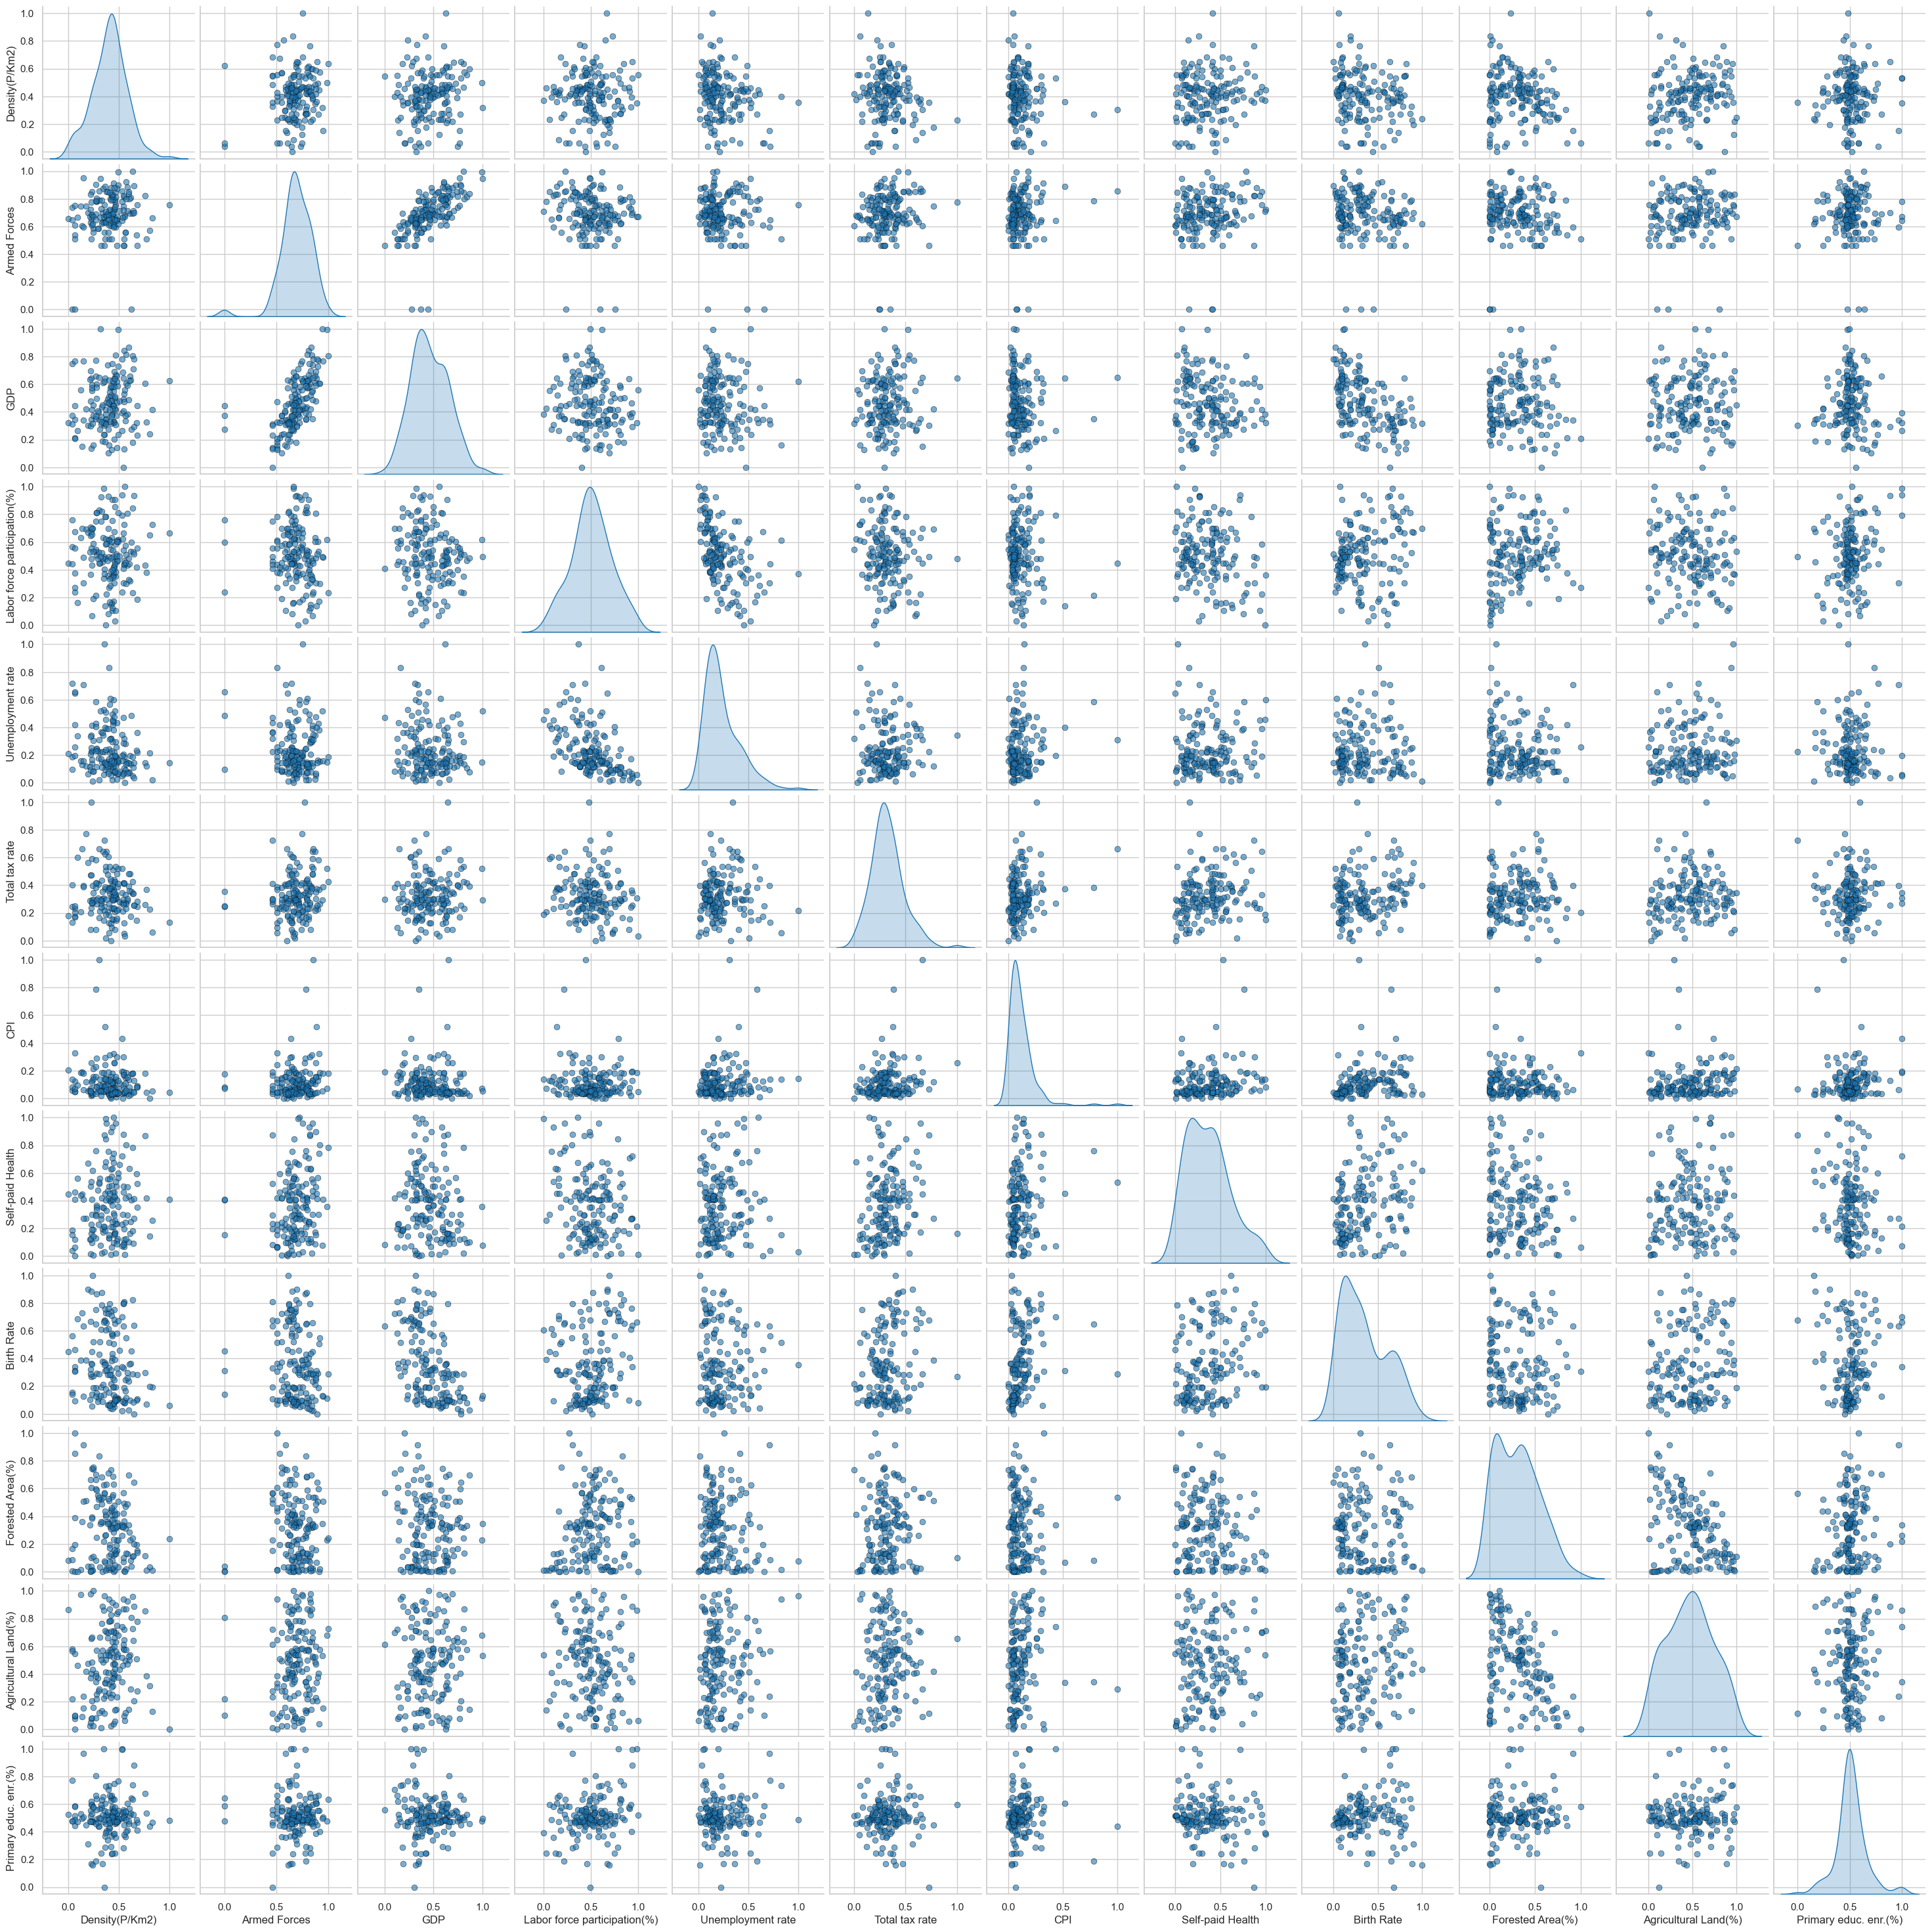

In [76]:
sns.set_style("whitegrid")  
sns.set_context("talk")  
sns.set_context("notebook")
g = sns.pairplot(dataset_scaled, 
                 diag_kind="kde",  
                 plot_kws={'alpha':0.6,'s': 40,'edgecolor': 'k'})  
plt.show()

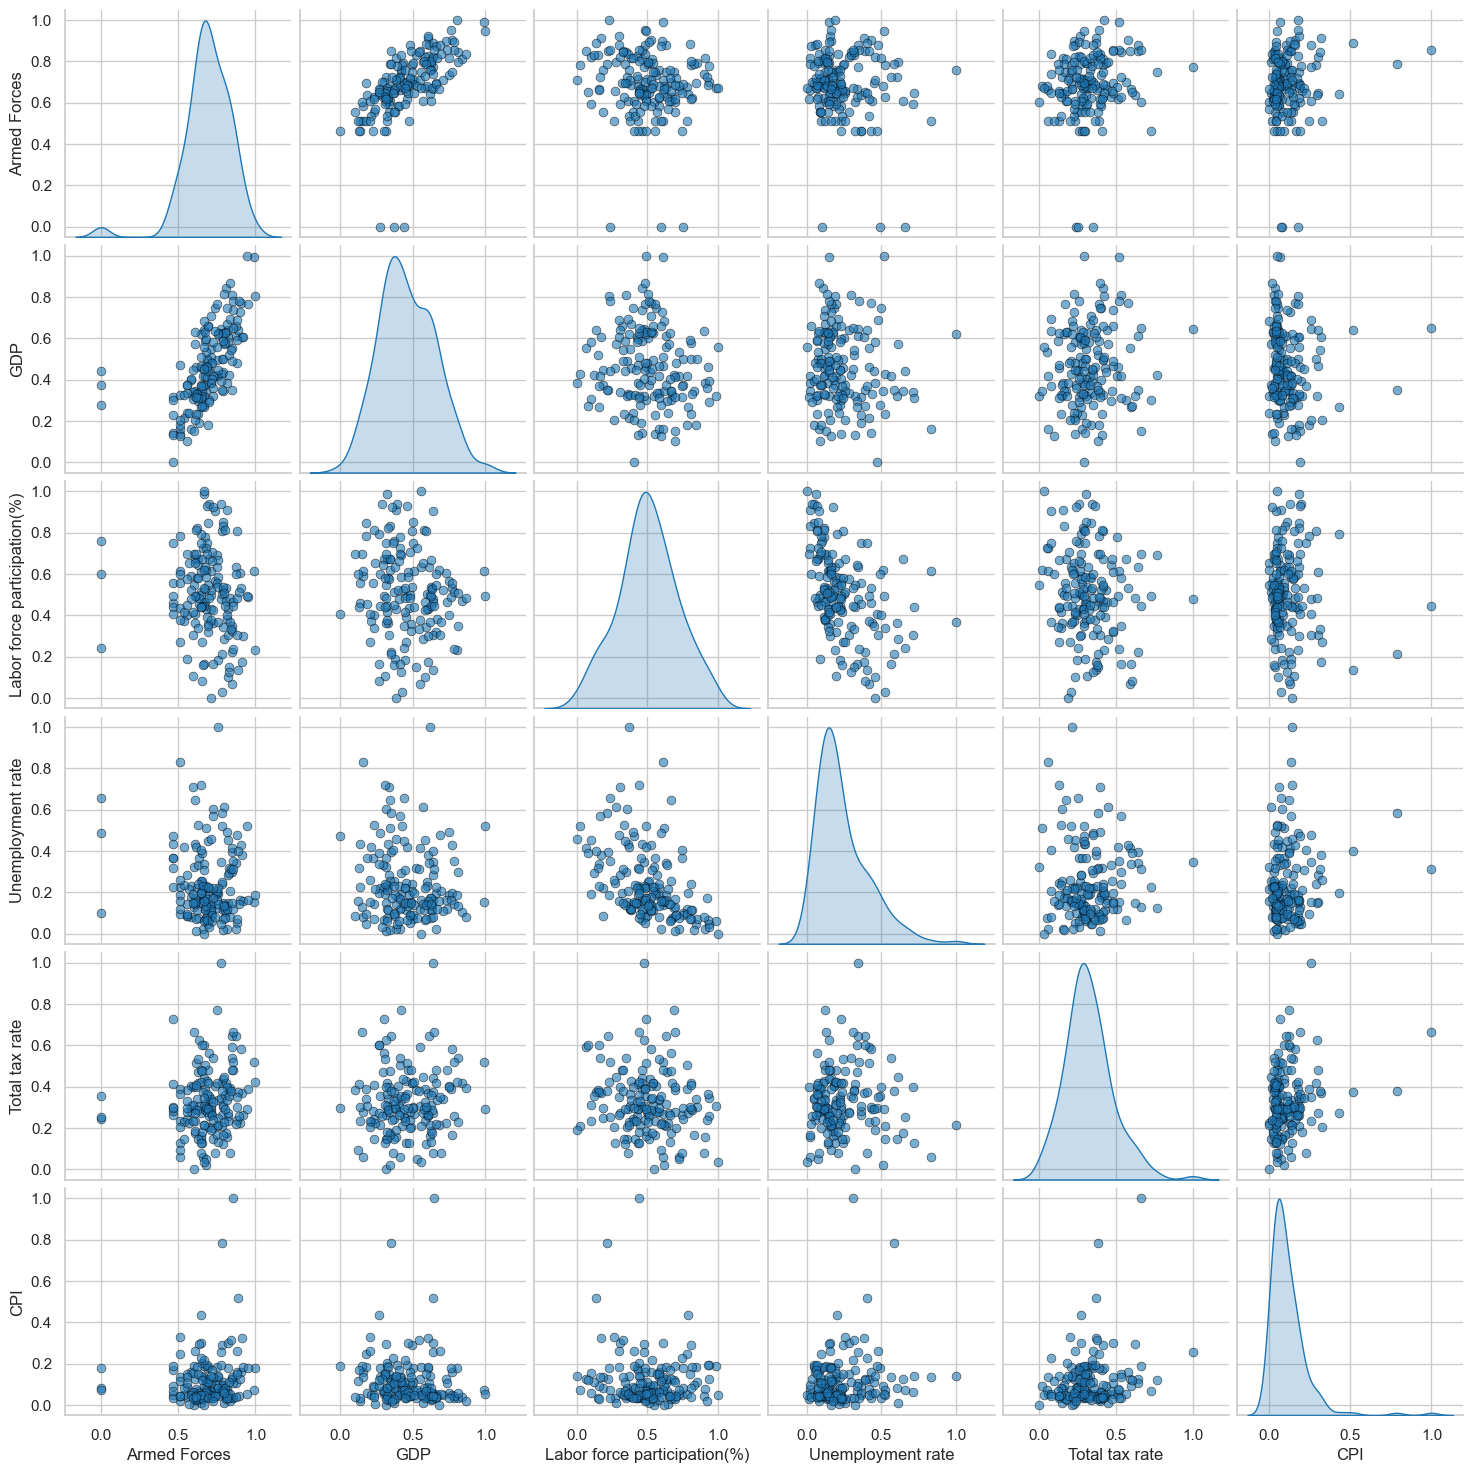

In [77]:
sns.set_style("whitegrid")  
sns.set_context("talk")  
sns.set_context("notebook")
g = sns.pairplot(dataset_scaled.loc[:,'Armed Forces':'CPI'], 
                 diag_kind="kde",  
                 plot_kws={'alpha':0.6,'s': 40,'edgecolor': 'k'})  
plt.show()

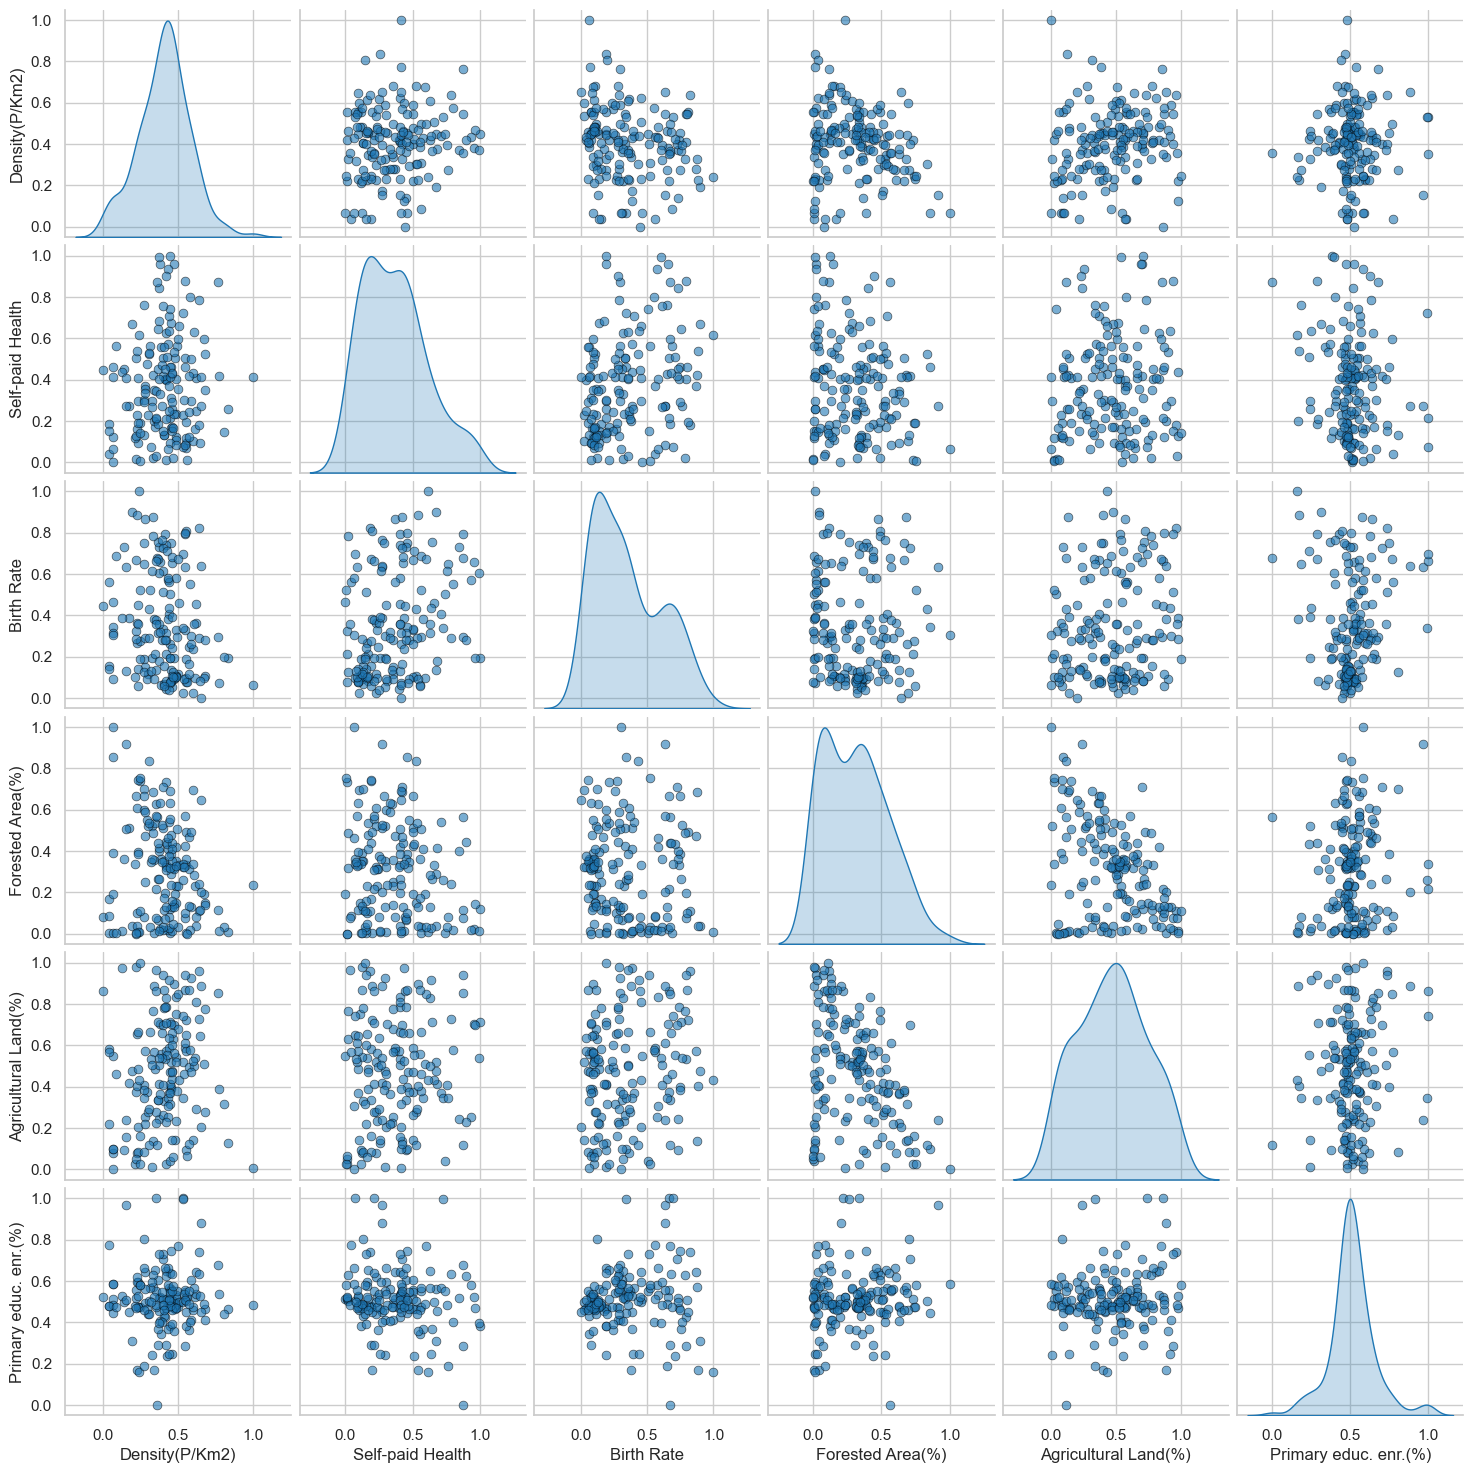

In [78]:
sns.set_style("whitegrid")  
sns.set_context("talk")  
sns.set_context("notebook")
g = sns.pairplot(dataset_scaled.drop(dataset_scaled.loc[:,'Armed Forces':'CPI'],axis=1).drop(['Country'],axis=1), # non economic variables 
                 diag_kind="kde",  
                 plot_kws={'alpha':0.6,'s': 40,'edgecolor': 'k'})  
plt.show()

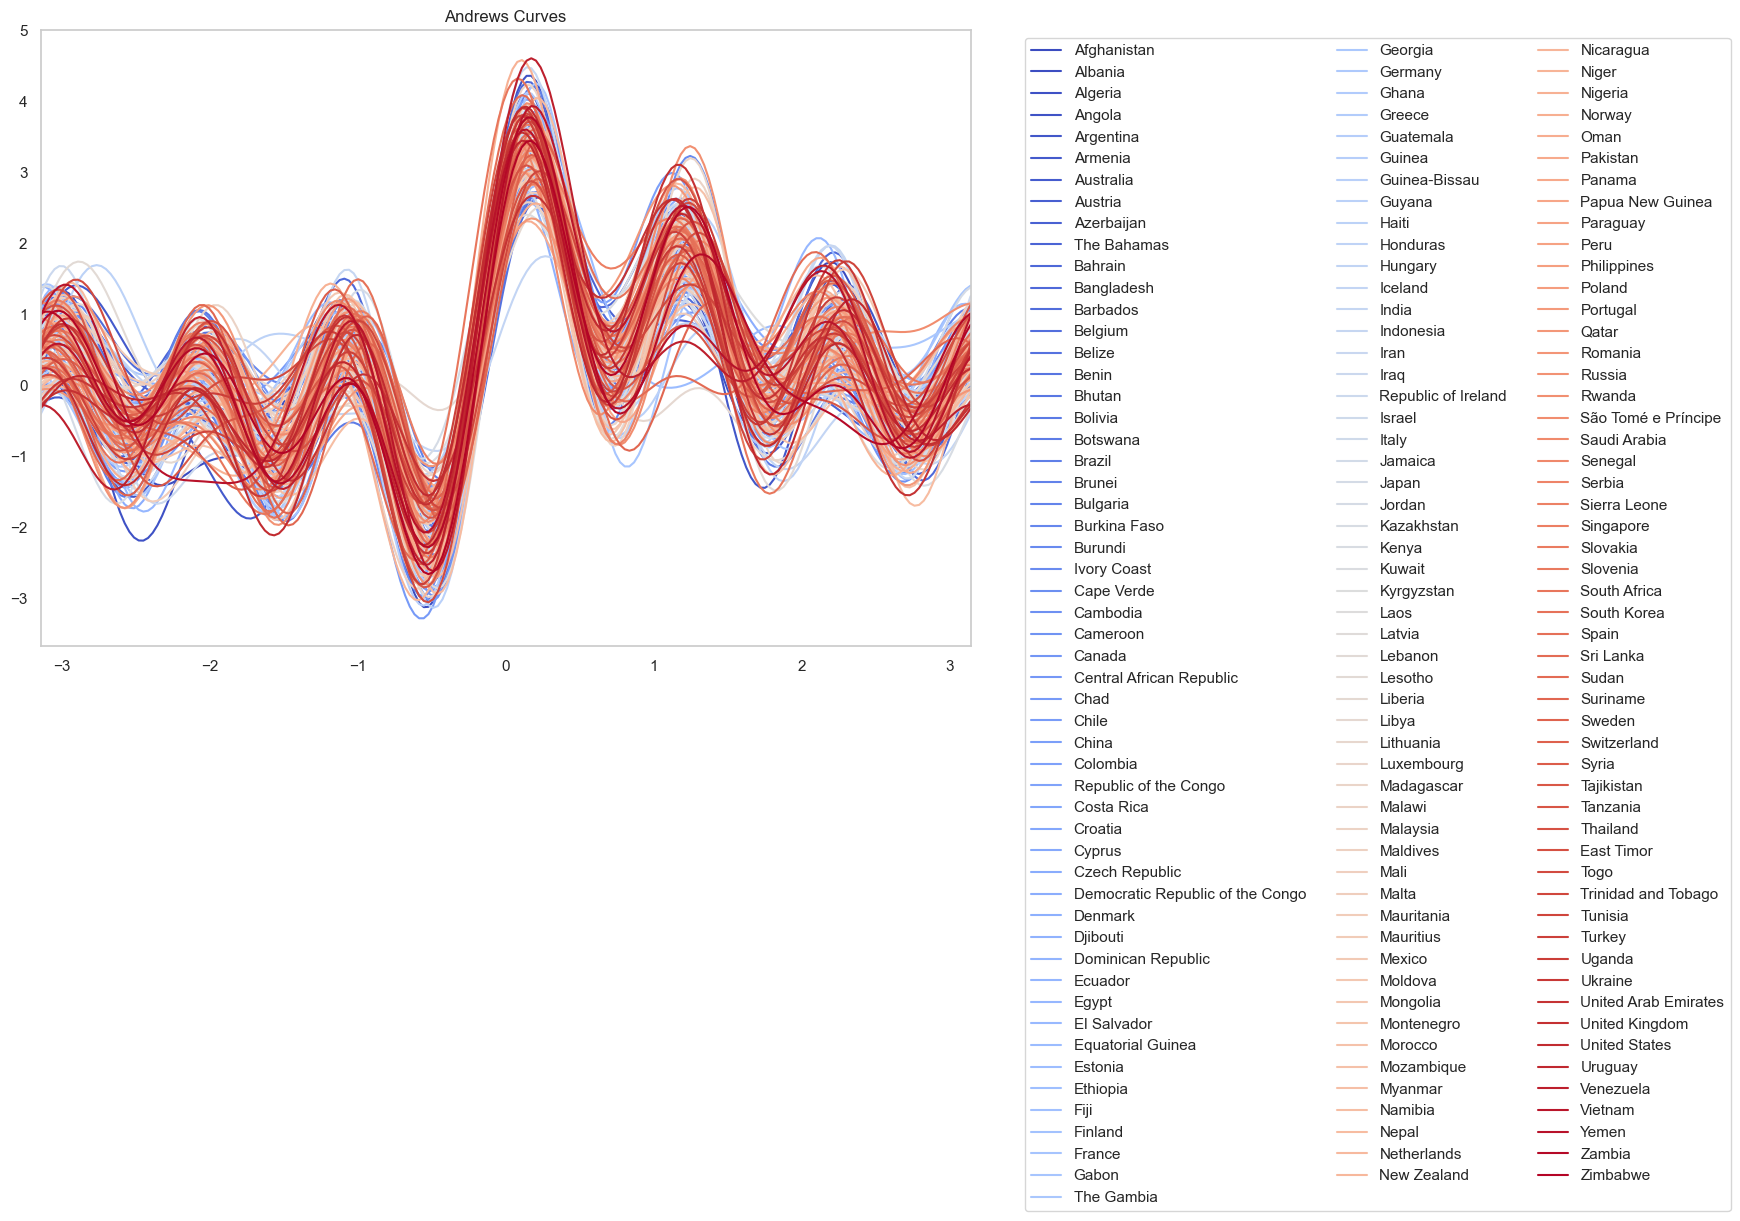

In [79]:
plt.figure(figsize=(12,8))
andrews_curves(dataset_scaled,class_column="Country",colormap='coolwarm')
plt.title("Andrews Curves")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',ncol=3)
plt.show()

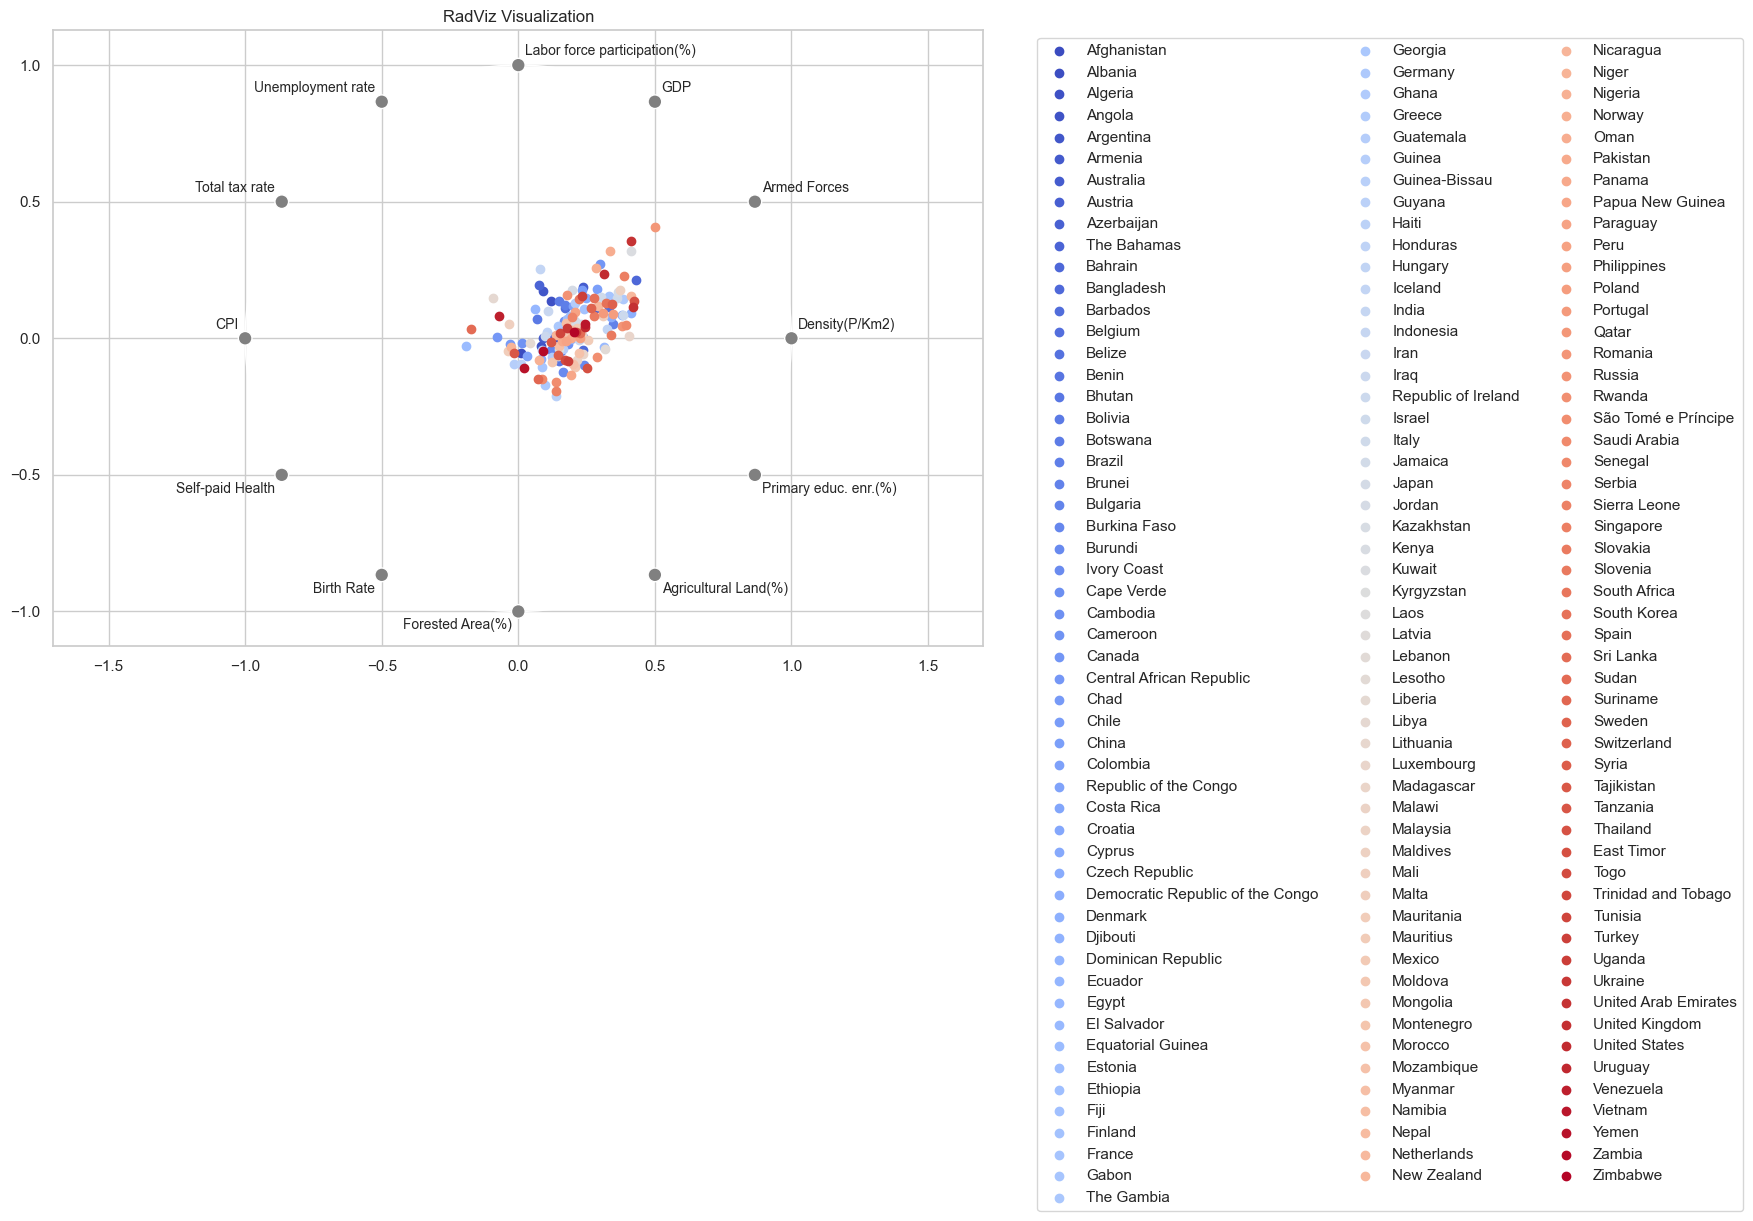

In [80]:
plt.figure(figsize=(12,8))
radviz(dataset_scaled,class_column="Country",colormap="coolwarm")  
plt.title("RadViz Visualization")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',ncol=3)
plt.show()

## clustering

In [81]:
from sklearn.cluster import KMeans

In [82]:
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dataset_scaled.drop('Country',axis=1))
    inertia.append(kmeans.inertia_)

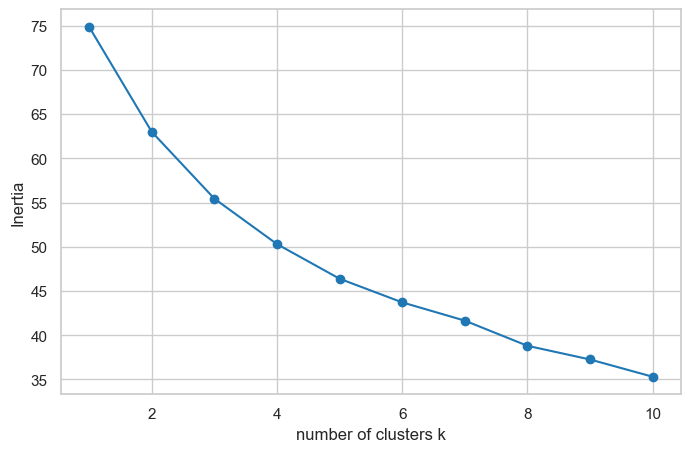

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("number of clusters k")
plt.ylabel("Inertia")
plt.show()

In [84]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters,random_state=42,n_init=10)
dataset_scaled["Cluster"] = kmeans.fit_predict(dataset_scaled.drop('Country',axis=1))

## plots after clustering

In [85]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.350876   
1        Albania        0.449396      0.610081  0.330232   
2        Algeria        0.232692      0.848721  0.552931   
3         Angola        0.276991      0.781937  0.498793   
4      Argentina        0.225876      0.774686  0.642846   
..           ...             ...           ...       ...   
155    Venezuela        0.302288      0.854003  0.649334   
156      Vietnam        0.586697      0.882141  0.592890   
157        Yemen        0.371188      0.710022  0.382571   
158       Zambia        0.272233      0.648629  0.368303   
159     Zimbabwe        0.323348      0.726300  0.361555   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
155                      0.444672           0.310075        0.664293   
156                      0.807377           0.068352        0.301119   
157                      0.000000           0.456390        0.189217   
158                      0.750000           0.403702        0.077314   
159                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
155  1.000000          0.530799    0.289315          0.536114   
156  0.150289          0.500655    0.260837          0.489318   
157  0.139181          0.992136    0.606099          0.010173   
158  0.228736          0.290957    0.750756          0.663276   
159  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)  Cluster  
0                0.701220               0.522924        2  
1                0.518293               0.560099        2  
2                0.204878               0.596035        2  
3                0.571951               0.640644        0  
4                0.654878               0.593556        2  
..                    ...                    ...      ...  
155              0.291463               0.438662        2  
156              0.471951               0.604709        1  
157              0.536585               0.394052        2  
158              0.384146               0.457249        0  
159              0.503659               0.596035        0  

[160 rows x 14 columns]

In [86]:
dataset_scaled['Cluster'] = dataset_scaled['Cluster'].replace({0:'poor',
                                                              1:'medium_rich',
                                                              2:'rich'
                                                              })

In [87]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.350876   
1        Albania        0.449396      0.610081  0.330232   
2        Algeria        0.232692      0.848721  0.552931   
3         Angola        0.276991      0.781937  0.498793   
4      Argentina        0.225876      0.774686  0.642846   
..           ...             ...           ...       ...   
155    Venezuela        0.302288      0.854003  0.649334   
156      Vietnam        0.586697      0.882141  0.592890   
157        Yemen        0.371188      0.710022  0.382571   
158       Zambia        0.272233      0.648629  0.368303   
159     Zimbabwe        0.323348      0.726300  0.361555   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
155                      0.444672           0.310075        0.664293   
156                      0.807377           0.068352        0.301119   
157                      0.000000           0.456390        0.189217   
158                      0.750000           0.403702        0.077314   
159                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
155  1.000000          0.530799    0.289315          0.536114   
156  0.150289          0.500655    0.260837          0.489318   
157  0.139181          0.992136    0.606099          0.010173   
158  0.228736          0.290957    0.750756          0.663276   
159  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)      Cluster  
0                0.701220               0.522924         rich  
1                0.518293               0.560099         rich  
2                0.204878               0.596035         rich  
3                0.571951               0.640644         poor  
4                0.654878               0.593556         rich  
..                    ...                    ...          ...  
155              0.291463               0.438662         rich  
156              0.471951               0.604709  medium_rich  
157              0.536585               0.394052         rich  
158              0.384146               0.457249         poor  
159              0.503659               0.596035         poor  

[160 rows x 14 columns]

In [88]:
medium_rich = dataset_scaled.loc[dataset_scaled['Cluster'] == 'medium_rich']

In [89]:
medium_rich

Country  Density(P/Km2)  Armed Forces       GDP  \
7                 Austria        0.454066      0.666849  0.642155   
9             The Bahamas        0.326539      0.462917  0.314068   
10                Bahrain        0.833991      0.660143  0.415839   
12               Barbados        0.681649      0.462917  0.230772   
14                 Belize        0.225876      0.509327  0.136553   
16                 Bhutan        0.245309      0.582917  0.160924   
19                 Brazil        0.272233      0.904612  0.773073   
20                 Brunei        0.420071      0.602190  0.318586   
25             Cape Verde        0.483564      0.462917  0.141448   
28                 Canada        0.064397      0.749406  0.767730   
31                  Chile        0.276991      0.784741  0.599822   
33               Colombia        0.346869      0.876660  0.612495   
35             Costa Rica        0.443305      0.617140  0.459366   
36                Croatia        0.404092      0.656521  0.457311   
37                 Cyprus        0.477050      0.648629  0.374127   
38         Czech Republic        0.484468      0.672944  0.587277   
43                Ecuador        0.400638      0.711677  0.510519   
47                Estonia        0.298409      0.582917  0.396781   
49                   Fiji        0.354670      0.555754  0.236392   
50                Finland        0.232692      0.678531  0.595273   
52                  Gabon        0.151778      0.593244  0.338224   
54                Georgia        0.373380      0.681159  0.344058   
61                 Guyana        0.064397      0.536484  0.212624   
63               Honduras        0.428768      0.672944  0.376103   
65                Iceland        0.036266      0.000000  0.372699   
67              Indonesia        0.494835      0.899463  0.727132   
71                 Israel        0.617127      0.810052  0.630889   
73                Jamaica        0.569118      0.555754  0.337109   
74                  Japan        0.599256      0.835697  0.866987   
78                 Kuwait        0.552940      0.678531  0.531465   
80                   Laos        0.302288      0.788479  0.346275   
81                 Latvia        0.294407      0.582917  0.404491   
85                  Libya        0.064397      0.000000  0.443581   
86              Lithuania        0.338554      0.699133  0.447309   
87             Luxembourg        0.553982      0.509327  0.472369   
90               Malaysia        0.442051      0.792019  0.623489   
91               Maldives        0.806632      0.570702  0.239571   
99             Montenegro        0.349523      0.629355  0.235708   
102               Myanmar        0.420071      0.880975  0.478627   
106           New Zealand        0.232692      0.610081  0.571107   
110                Norway        0.211028      0.672944  0.632796   
111                  Oman        0.218671      0.720828  0.479711   
113                Panama        0.375535      0.681159  0.466597   
114      Papua New Guinea        0.245309      0.555754  0.375638   
116                  Peru        0.276991      0.802066  0.579602   
119              Portugal        0.456337      0.727601  0.583916   
120                 Qatar        0.557057      0.669966  0.559983   
122                Russia        0.151778      0.950780  0.765764   
129             Singapore        1.000000      0.757298  0.625336   
130              Slovakia        0.459669      0.648629  0.508770   
131              Slovenia        0.446995      0.593244  0.446492   
133           South Korea        0.651812      0.895165  0.782123   
137              Suriname        0.064397      0.509327  0.206019   
138                Sweden        0.272233      0.690747  0.658185   
139           Switzerland        0.541447      0.666849  0.684161   
143              Thailand        0.482654      0.872936  0.660390   
146   Trinidad and Tobago        0.569118      0.555754  0.372363   
151  United Arab

In [90]:
rich = dataset_scaled.loc[dataset_scaled['Cluster'] == 'rich']

In [91]:
rich

Country  Density(P/Km2)  Armed Forces       GDP  \
0            Afghanistan        0.379738      0.849978  0.350876   
1                Albania        0.449396      0.610081  0.330232   
2                Algeria        0.232692      0.848721  0.552931   
4              Argentina        0.225876      0.774686  0.642846   
5                Armenia        0.448201      0.723620  0.319971   
6              Australia        0.036266      0.734918  0.747340   
8             Azerbaijan        0.469168      0.758120  0.417344   
11            Bangladesh        0.762057      0.824550  0.606226   
13               Belgium        0.611666      0.695071  0.657971   
21              Bulgaria        0.387744      0.692944  0.489949   
32                 China        0.496483      0.992127  0.993210   
40               Denmark        0.482654      0.644305  0.619177   
41              Djibouti        0.338554      0.634718  0.189102   
42    Dominican Republic        0.544839      0.748469  0.493057   
44                 Egypt        0.446995      0.913697  0.606410   
45           El Salvador        0.586296      0.713291  0.382942   
51                France        0.465035      0.846574  0.809062   
55               Germany        0.552940      0.810801  0.841224   
57                Greece        0.417033      0.796773  0.572404   
64               Hungary        0.451753      0.710022  0.547890   
66                 India        0.635794      1.000000  0.805434   
68                  Iran        0.362015      0.887207  0.641954   
69                  Iraq        0.434250      0.820810  0.582508   
70   Republic of Ireland        0.402377      0.610081  0.629379   
72                 Italy        0.533768      0.854780  0.780850   
75                Jordan        0.460761      0.781361  0.427464   
76            Kazakhstan        0.123647      0.748469  0.558303   
82               Lebanon        0.681461      0.756465  0.445844   
93                 Malta        0.773018      0.509327  0.327207   
95             Mauritius        0.673476      0.536484  0.323340   
96                Mexico        0.391565      0.852622  0.737960   
97               Moldova        0.469168      0.593244  0.307564   
100              Morocco        0.420071      0.831731  0.519755   
105          Netherlands        0.647192      0.711677  0.707912   
109              Nigeria        0.545395      0.822706  0.642528   
112             Pakistan        0.575400      0.921268  0.606783   
117          Philippines        0.606643      0.799911  0.626504   
118               Poland        0.470181      0.814775  0.668291   
121              Romania        0.421563      0.786902  0.588613   
125         Saudi Arabia        0.218671      0.833346  0.695281   
127               Serbia        0.443305      0.695071  0.442389   
132         South Africa        0.354670      0.756465  0.620063   
134                Spain        0.435584      0.816507  0.747435   
135            Sri Lanka        0.597064      0.848721  0.487783   
136                Sudan        0.272233      0.785830  0.349907   
140                Syria        0.436904      0.829797  0.420126   
141           Tajikistan        0.395273      0.652691  0.271768   
147              Tunisia        0.409102      0.722238  0.416374   
148               Turkey        0.455207      0.880845  0.690674   
150              Ukraine        0.407454      0.844355  0.543669   
152       United Kingdom        0.572746      0.797685  0.812784   
153        United States        0.316711      0.946253  1.000000   
154              Uruguay        0.245309      0.669966  0.450371   
155            Venezuela        0.302288      0.854003  0.649334   
157                Yemen        0.371188      0.710022  0.382571   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.29

In [92]:
poor = dataset_scaled.loc[dataset_scaled['Cluster'] == 'poor']

In [93]:
poor

Country  Density(P/Km2)  Armed Forces       GDP  \
3                              Angola        0.276991      0.781937  0.498793   
15                              Benin        0.452914      0.629355  0.324701   
17                            Bolivia        0.174762      0.748469  0.421241   
18                           Botswana        0.064397      0.610081  0.347119   
22                       Burkina Faso        0.409102      0.623525  0.333019   
23                            Burundi        0.635523      0.692944  0.180149   
24                        Ivory Coast        0.420071      0.683688  0.454793   
26                           Cambodia        0.436904      0.814775  0.383170   
27                           Cameroon        0.371188      0.675796  0.416285   
29           Central African Republic        0.138495      0.602190  0.151950   
30                               Chad        0.194195      0.701075  0.302475   
34              Republic of the Congo        0.218671      0.629355  0.298346   
39   Democratic Republic of the Congo        0.329652      0.791027  0.434727   
46                  Equatorial Guinea        0.357166      0.462917  0.300090   
48                           Ethiopia        0.460761      0.792998  0.500220   
53                         The Gambia        0.552416      0.462917  0.130676   
56                              Ghana        0.482654      0.648629  0.466850   
58                          Guatemala        0.507452      0.714868  0.479383   
59                             Guinea        0.364372      0.634718  0.319411   
60                      Guinea-Bissau        0.398875      0.555754  0.105301   
62                              Haiti        0.621453      0.000000  0.276023   
77                              Kenya        0.435584      0.688475  0.499637   
79                         Kyrgyzstan        0.309706      0.666849  0.275539   
83                            Lesotho        0.400638      0.509327  0.161429   
84                            Liberia        0.364372      0.509327  0.181917   
88                         Madagascar        0.352123      0.669966  0.322709   
89                             Malawi        0.531928      0.644305  0.266497   
92                               Mali        0.225876      0.656521  0.342836   
94                         Mauritania        0.087381      0.666849  0.265613   
98                           Mongolia        0.000000      0.656521  0.321180   
101                        Mozambique        0.329652      0.623525  0.328127   
103                           Namibia        0.036266      0.648629  0.310689   
104                             Nepal        0.531928      0.779010  0.394559   
107                         Nicaragua        0.368956      0.629355  0.311836   
108                             Niger        0.239158      0.617140  0.314794   
115                          Paraguay        0.232692      0.683688  0.414806   
123                            Rwanda        0.651333      0.701075  0.292181   
124               São Tomé e Príncipe        0.546501      0.462917  0.000000   
126                           Senegal        0.425935      0.660143  0.370338   
128                      Sierra Leone        0.456337      0.610081  0.204998   
142                          Tanzania        0.393432      0.686124  0.461442   
144                        East Timor        0.428768      0.509327  0.125819   
145                              Togo        0.495661      0.617140  0.235121   
149                            Uganda        0.547050      0.719387  0.405219   
158                            Zambia        0.272233      0.648629  0.368303   
159                          Zimbabwe        0.323348      0.726300  0.361555   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
3                        0.809426           0.242079        0.418108   
15                       0.674180           0.076184        0.416073   
17    

In [94]:
dataset_scaled.to_csv("dataset_scaled.csv",index=False) # dataset scaled

In [95]:
poor['GDP'].mean()

0.3187361986857153

In [96]:
rich['GDP'].mean()

0.5650706991085781

In [97]:
medium_rich['GDP'].mean()

0.4804720927503165

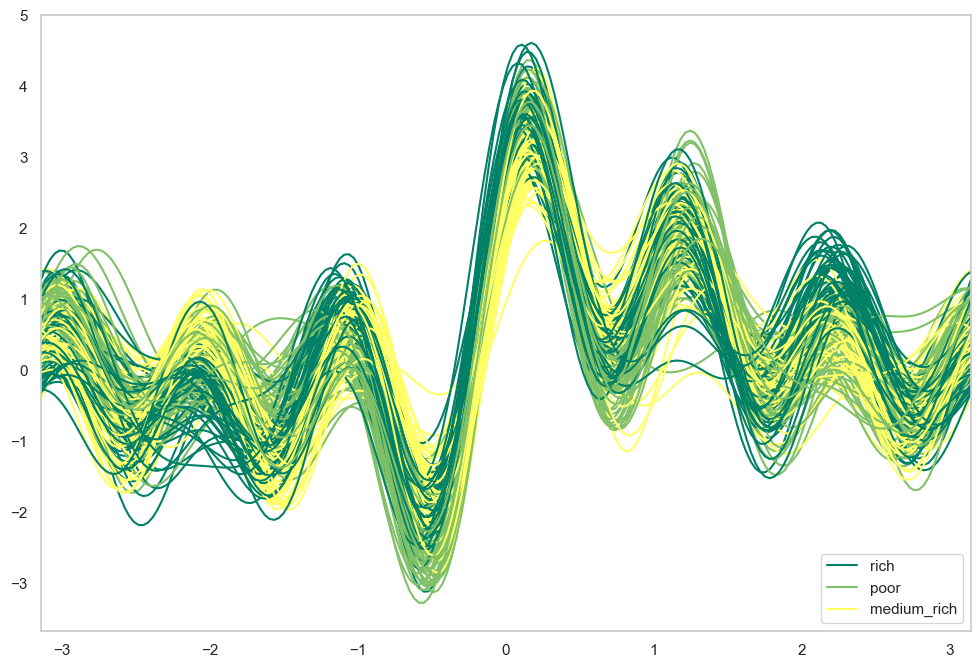

In [98]:
plt.figure(figsize=(12,8))
andrews_curves(dataset_scaled.drop('Country',axis=1),class_column="Cluster",colormap='summer')
plt.legend(loc='lower right',ncol=1)
plt.show()

# pca

Perform Principal Component Analysis on multidimensional data set. Determine, what percentage of the total variance is in each component, what percentage is within two principal components. Visualize two principal components using a scatter plot. Include the image in the report and compare with the results of direct visualization, also include general conclusions.

## data normalization

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
x_pca = dataset_raw.drop(['Country'],axis=1).values

In [101]:
x_pca = StandardScaler().fit_transform(x_pca)

In [102]:
x_pca.shape

(120, 26)

In [103]:
np.mean(x_pca),np.std(x_pca)

(-1.67956816545857e-17, 1.0)

## pca results

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA()

In [106]:
principal_components = pca.fit_transform(x_pca)

In [107]:
pd.DataFrame(principal_components)

0         1         2         3         4         5         6   \
0   -3.865705  1.056522 -2.224572  0.870985  0.234216  0.602765  1.000088   
1    1.266918 -1.103803 -0.826468  0.423707 -0.098733 -0.267624  1.255340   
2    0.617105 -0.071428 -1.701000 -0.493026 -0.615844  1.184680  2.312338   
3   -4.232458  0.694133  0.643558 -1.409973  0.720075  0.163558  0.233044   
4    1.084179  0.850580 -3.390819 -4.282275  2.249778 -0.831812  0.855986   
..        ...       ...       ...       ...       ...       ...       ...   
115  3.345992 -0.772954  0.378838  0.878360  2.320573  1.049451 -1.096281   
116  4.763555  8.226009  0.887081 -2.089362 -0.188611  2.901756 -0.926432   
117  2.035815 -1.296332 -1.073104 -0.279331  1.451032  1.413322  0.389992   
118  0.086830  0.228994  1.342511  0.938886 -0.570015 -1.304321  0.585046   
119 -2.740205 -0.547728  1.359496 -1.189699  0.388492  0.327090 -0.378445   

           7         8         9         10        11        12        13  \
0   -0.962639  2.317759  0.636190  0.438384 -0.454293  0.104803  0.413406   
1   -0.967197 -0.255232 -0.441822  0.229129 -0.429141  0.445403  0.385637   
2   -1.264935  0.822292  1.964438  0.431697  3.191536 -0.422817 -0.315736   
3    1.045313 -0.218887 -0.199021  0.107087 -0.168399  0.249715  0.359253   
4    2.854063  2.920816 -0.290104 -0.537475  0.359770  1.095571 -0.528397   
..        ...       ...       ...       ...       ...       ...       ...   
115  0.571164 -0.569257  0.124484 -0.155622  0.196179 -0.372494  0.361015   
116 -0.446780 -1.021173  1.799862  0.452933 -1.788959  2.059211 -1.229125   
117  1.122590 -0.160014 -1.671945 -0.275357 -0.198680  0.023755  0.067913   
118  1.070773 -0.587237 -0.477431  0.272371  0.761591  0.184301 -0.335426   
119 -1.279637 -2.177204 -0.986440  0.369597 -0.490779  0.105569  0.092107   

           14        15        16        17        18        19        20  \
0    0.817645 -0.017394  0.428096  0.225815  0.337853 -0.684283 -0.072770   
1    0.215690 -0.690948  0.028151 -1.160278  0.843138 -0.241361 -0.293665   
2    0.635696  0.840201 -0.420857  1.300736  0.107621  0.705202 -0.145716   
3   -0.433582 -0.567787  0.115049 -0.235366 -0.794931  0.855775  0.325190   
4   -1.182027  1.307125 -0.104686 -0.917883 -0.726745  0.597151 -0.298015   
..        ...       ...       ...       ...       ...       ...       ...   
115  0.764385 -0.133374  0.203715 -0.415461 -0.175858 -0.059306  0.116624   
116  1.520759 -0.113570 -1.032508 -0.631861  0.013168  0.545214  1.262262   
117 -0.989365 -0.504055 -0.647871  0.131258 -0.114574 -0.563730  0.108746   
118  0.389674 -0.176532  0.710063 -0.127593 -0.140173  0.348621  0.346249   
119 -0.836238 -0.685731 -0.000852 -0.556963 -0.884464  0.552569  0.003431   

           21        22        23        24        25  
0    0.664899 -0.081999  0.195339 -0.030669 -0.104096  
1    0.026310  0.088370 -0.033900 -0.046249 -0.162845  
2    0.356106  0.261625 -0.100480  0.033789  0.029545  
3   -0.355203  0.035630  0.102866  0.099602 -0.132511  
4   -0.261856 -0.129426 -0.168406 -0.008381 -0.060446  
..        ...       ...       ...       ...       ...  
115  0.058467  0.035287 -0.149697  0.175870  0.011797  
116  0.821979 -0.152982 -0.577262 -0.132684  0.001163  
117  0.287355  0.247968 -0.026379 -0.049898  0.021333  
118  0.348886  0.119873  0.174018  0.015487 -0.074868  
119 -0.051387  0.057954  0.031993  0.006401  0.073945  

[120 rows x 26 columns]

In [108]:
pca.explained_variance_ratio_.round(2)

array([0.27, 0.18, 0.09, 0.07, 0.05, 0.05, 0.04, 0.04, 0.04, 0.03, 0.02,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ])

## two componets pca

In [109]:
pca_2 = PCA(n_components=2)

In [110]:
principal_components_2 = pca_2.fit_transform(x_pca)

In [119]:
principal_components_2_df = pd.DataFrame(principal_components_2,columns=['principal component 1', 'principal component 2'])

In [121]:
principal_components_2_df

principal component 1  principal component 2
0                -3.865705               1.056522
1                 1.266918              -1.103803
2                 0.617105              -0.071428
3                -4.232458               0.694133
4                 1.084179               0.850580
..                     ...                    ...
115               3.345992              -0.772954
116               4.763555               8.226009
117               2.035815              -1.296332
118               0.086830               0.228994
119              -2.740205              -0.547728

[120 rows x 2 columns]

In [122]:
print('Explained variability per principal component: {}'.format(pca_2.explained_variance_ratio_))

Explained variability per principal component: [0.26589837 0.18290422]


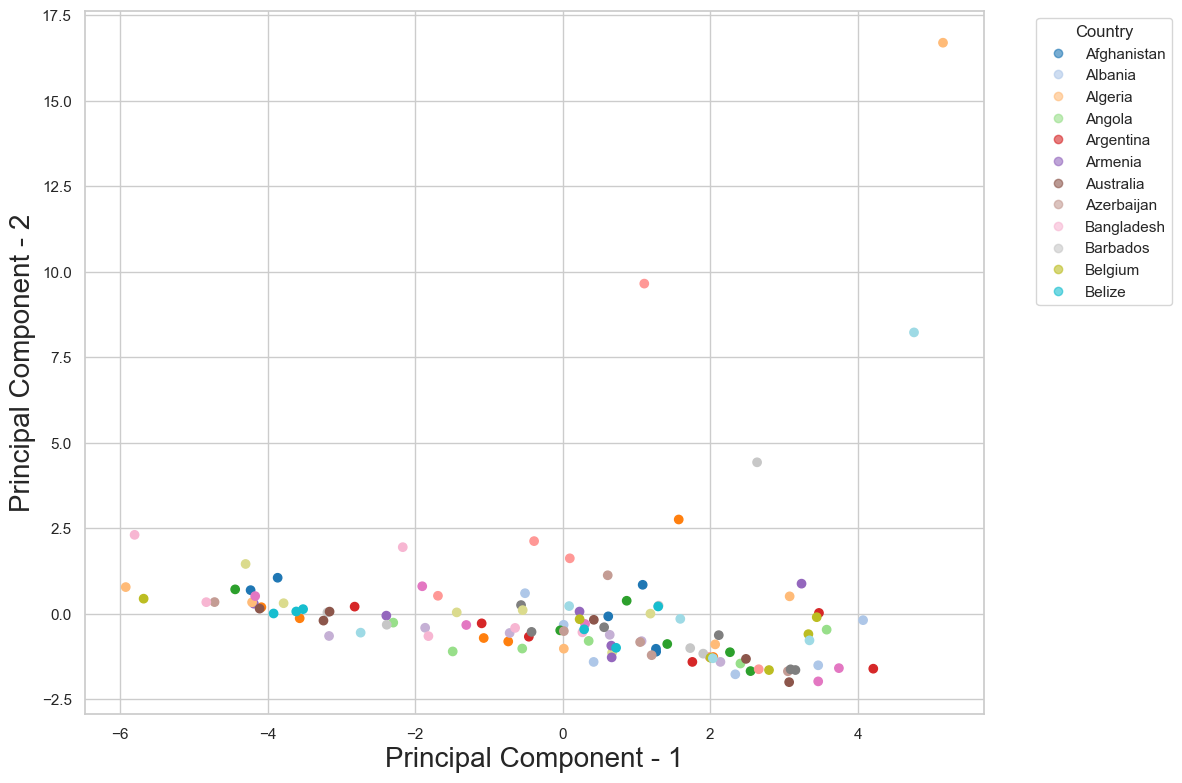

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target = le.fit_transform(dataset_raw['Country'])

plt.figure(figsize=(12, 8))
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
scatter = plt.scatter(
    principal_components_2_df['principal component 1'],
    principal_components_2_df['principal component 2'],
    c=target,
    cmap='tab20'  
)

handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = le.classes_
plt.legend(handles, legend_labels, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
